El siguiente notebook elimina en el dataset original los contaminantes y factores atmosféricos que no serán utilizados para el análisis. El propósito es que el archivo .csv resultante pueda ser usado para filtarar estaciones de interés y realizar un análisis estadístico sobre los contaminantes en la estación dada

In [65]:
import pandas as pd
import numpy as np

In [66]:
raw_data = path= "Input/DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES_ITESM.xlsx"
#raw_data = path= "/content/DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES_ITESM.xlsx"

raw_data = pd.read_excel(path, index_col=0, header=[0,1])
raw_data = raw_data.dropna(axis=1, how='all')
raw_data.head()

SURESTE                                                    \
                         CO    NO   NO2   NOX   O3   PM10  PM2.5    PRS RAINF   
2023-01-01 00:00:00    2.37  54.5  32.6  87.1  3.0  110.0  68.00  721.7   0.0   
2023-01-01 01:00:00    2.12  38.7  30.3  68.9  3.0  116.0  67.18  721.5   0.0   
2023-01-01 02:00:00    2.05  38.7  28.8  67.4  3.0  117.0  75.12  721.1   0.0   
2023-01-01 03:00:00    2.50  60.5  29.1  89.4  3.0  135.0  82.81  720.8   0.0   
2023-01-01 04:00:00    1.94  42.3  25.7  67.7  NaN  132.0  59.56  720.7   0.0   

                           ... NOROESTE 3                                     \
                       RH  ...       PM10 PM2.5    PRS RAINF    RH  SO2   SR   
2023-01-01 00:00:00  68.0  ...        NaN   NaN    NaN   NaN   NaN  NaN  NaN   
2023-01-01 01:00:00  72.0  ...      246.0   NaN  707.4   0.0  59.0  2.9  0.0   
2023-01-01 02:00:00  71.0  ...      239.0   NaN  707.0   0.0  59.0  3.2  0.0   
2023-01-01 03:00:00  68.0  ...      275.0   NaN  706.8   0.0  59.0  2.3  0.0   
2023-01-01 04:00:00  73.0  ...        NaN   NaN  706.8   0.0  58.0  1.8  0.0   

                                        
                      TOUT   WSR   WDR  
2023-01-01 00:00:00    NaN   NaN   NaN  
2023-01-01 01:00:00  14.14  65.3  95.0  
2023-01-01 02:00:00  14.11  60.9  90.0  
2023-01-01 03:00:00  14.08  58.1  84.0  
2023-01-01 04:00:00  12.94  61.4  87.0  

[5 rows x 224 columns]

In [67]:
raw_data.shape

(13870, 224)

Las dimensiones del dataframe sin haberlo procesado son las siguientes: 13,870 observaciones y 225 columnas.
Para determinar este número se debe de considerar lo siguiente: Las fechas y las filas descriptivas (Estación, contaminante y dato meteorológico y unidades del contaminante o del dato meteorológico) no están siendo consideradas.
Por otra parte cada estación cuenta con 15 mediciones distintas, se tienen 15 estaciones en el sistema de monitoreo estatal.
De esta manera se confirma que originalmente se tienen las 15 medidciones de cada sensor: 15 x 15 = 225.


In [68]:
raw_data.columns

MultiIndex([(   'SURESTE',    'CO'),
            (   'SURESTE',    'NO'),
            (   'SURESTE',   'NO2'),
            (   'SURESTE',   'NOX'),
            (   'SURESTE',    'O3'),
            (   'SURESTE',  'PM10'),
            (   'SURESTE', 'PM2.5'),
            (   'SURESTE',   'PRS'),
            (   'SURESTE', 'RAINF'),
            (   'SURESTE',    'RH'),
            ...
            ('NOROESTE 3',  'PM10'),
            ('NOROESTE 3', 'PM2.5'),
            ('NOROESTE 3',   'PRS'),
            ('NOROESTE 3', 'RAINF'),
            ('NOROESTE 3',    'RH'),
            ('NOROESTE 3',   'SO2'),
            ('NOROESTE 3',    'SR'),
            ('NOROESTE 3',  'TOUT'),
            ('NOROESTE 3',   'WSR'),
            ('NOROESTE 3',   'WDR')],
           length=224)

In [69]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13870 entries, 2023-01-01 00:00:00 to 2024-07-31 23:00:00
Columns: 224 entries, ('SURESTE', 'CO') to ('NOROESTE 3', 'WDR')
dtypes: float64(224)
memory usage: 23.8 MB


Eliminación de registros no relacionados con contaminantes no relevantes

In [70]:
excluded_columns=["TOUT","RH","SR","RAINF","PRS"]
cols = raw_data.columns.to_flat_index()
filtered_cols= [col for col in cols if col[1] not in excluded_columns]
filtered_df=raw_data.loc[:,pd.MultiIndex.from_tuples(filtered_cols)]
filtered_df.shape

(13870, 149)

Eliminación de registros de contaminantes que se determinó mediante nuestra investigación que eran menos probables a ser dispersos por el aire

In [71]:
excluded_contaminants=["CO","NO","NOX"]
cols = filtered_df.columns.to_flat_index()
filtered_cols= [col for col in cols if col[1] not in excluded_contaminants]
filtered_df=filtered_df.loc[:,pd.MultiIndex.from_tuples(filtered_cols)]
filtered_df.shape

(13870, 104)

# Selección de las estaciones de interés

Norte 2
Norte
Noreste
Sureste
Centro
Noroeste

In [72]:
stations = ["NORTE 2", "NORESTE", "SURESTE", "CENTRO", "SUROESTE",
            "NOROESTE 2", "NORESTE2", "SURESTE2", "SUROESTE2",
            "SURESTE 3", "SUR","NORESTE 3", "NOROESTE 3"]

cols = filtered_df.columns.to_flat_index()
selected_columns = [col for col in cols if col[0] in stations]
df = filtered_df.loc[:, pd.MultiIndex.from_tuples(selected_columns)]
df.head()

SURESTE                                     NORESTE       \
                        NO2   O3   PM10  PM2.5  SO2  WSR    WDV     NO2   O3   
2023-01-01 00:00:00    32.6  3.0  110.0  68.00  3.5  3.2  257.0    43.0  7.0   
2023-01-01 01:00:00    30.3  3.0  116.0  67.18  3.4  3.3  278.0    44.4  8.0   
2023-01-01 02:00:00    28.8  3.0  117.0  75.12  3.6  3.7  278.0    41.5  7.0   
2023-01-01 03:00:00    29.1  3.0  135.0  82.81  3.8  3.6  197.0    42.3  6.0   
2023-01-01 04:00:00    25.7  NaN  132.0  59.56  3.6  4.9  271.0    39.9  5.0   

                            ... NORESTE 3             NOROESTE 3              \
                      PM10  ...       SO2  WSR    WDR        NO2   O3   PM10   
2023-01-01 00:00:00  222.0  ...       2.7  0.5  305.0        NaN  NaN    NaN   
2023-01-01 01:00:00  311.0  ...       2.8  3.6  254.0       28.8  3.0  246.0   
2023-01-01 02:00:00  723.0  ...       2.8  4.1  250.0       26.8  3.0  239.0   
2023-01-01 03:00:00  473.0  ...       2.9  4.4  246.0       24.0  2.0  275.0   
2023-01-01 04:00:00  372.0  ...       2.9  5.1  264.0       22.2  2.0    NaN   

                                            
                    PM2.5  SO2   WSR   WDR  
2023-01-01 00:00:00   NaN  NaN   NaN   NaN  
2023-01-01 01:00:00   NaN  2.9  65.3  95.0  
2023-01-01 02:00:00   NaN  3.2  60.9  90.0  
2023-01-01 03:00:00   NaN  2.3  58.1  84.0  
2023-01-01 04:00:00   NaN  1.8  61.4  87.0  

[5 rows x 90 columns]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13870 entries, 2023-01-01 00:00:00 to 2024-07-31 23:00:00
Data columns (total 90 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (SURESTE, NO2)       13717 non-null  float64
 1   (SURESTE, O3)        13464 non-null  float64
 2   (SURESTE, PM10)      13488 non-null  float64
 3   (SURESTE, PM2.5)     10188 non-null  float64
 4   (SURESTE, SO2)       13648 non-null  float64
 5   (SURESTE, WSR)       13742 non-null  float64
 6   (SURESTE, WDV)       13740 non-null  float64
 7   (NORESTE, NO2)       13654 non-null  float64
 8   (NORESTE, O3)        13198 non-null  float64
 9   (NORESTE, PM10)      13434 non-null  float64
 10  (NORESTE, PM2.5)     12314 non-null  float64
 11  (NORESTE, SO2)       13474 non-null  float64
 12  (NORESTE, WSR)       13658 non-null  float64
 13  (NORESTE, WDV)       13644 non-null  float64
 14  (CENTRO, NO2)        13537 non-null  float64
 15  (

In [74]:
df.columns

MultiIndex([(   'SURESTE',   'NO2'),
            (   'SURESTE',    'O3'),
            (   'SURESTE',  'PM10'),
            (   'SURESTE', 'PM2.5'),
            (   'SURESTE',   'SO2'),
            (   'SURESTE',   'WSR'),
            (   'SURESTE',   'WDV'),
            (   'NORESTE',   'NO2'),
            (   'NORESTE',    'O3'),
            (   'NORESTE',  'PM10'),
            (   'NORESTE', 'PM2.5'),
            (   'NORESTE',   'SO2'),
            (   'NORESTE',   'WSR'),
            (   'NORESTE',   'WDV'),
            (    'CENTRO',   'NO2'),
            (    'CENTRO',    'O3'),
            (    'CENTRO',  'PM10'),
            (    'CENTRO', 'PM2.5'),
            (    'CENTRO',   'SO2'),
            (    'CENTRO',   'WSR'),
            (    'CENTRO',   'WDV'),
            (  'SUROESTE',   'NO2'),
            (  'SUROESTE',    'O3'),
            (  'SUROESTE',  'PM10'),
            (  'SUROESTE', 'PM2.5'),
            (  'SUROESTE',   'SO2'),
            (  'SUROESTE',   'WSR'),
 

In [75]:
filtered_df.to_csv("Output/ContaminantesFiltrados.csv")
#filtered_df.to_csv("ContaminantesFiltrados.csv")

#Exploración de datos
Con los datos filtrados con los contaminantes y observaciones meteorológicas que no tienen ningún interés para nosotros se propone explorar la estructura general de los datos que se planean utilizar. Para la descripción de los datos en general se aprovechará la característica de que cada estación presenta las mismas mediciones.
De esta manera la estructura general de los datos es la siguiente:


*   Índice: Tienmpo de la toma del dato (formato fecha y hora) - variable numérica.
*   NO2: Concentración de dióxido de nitrógeno detectada en partículas por billón - variable numérica.
*   O3: Concentración de Ozono detectada en partículas por billón - variable numérica.
*   PM10: Concentración de material particulado menor a 10 micrómetros en microgramos sobre metro cúbico - variable numérica.
*   PM2.5: Concentración de material particulado menor a 2.5 micrómetros en microgramos por metro cúbico - variable numérica.
*   SO2: Concentración de dióxido de azufre en partículas por billón - variable numérica.
*   WSR: Velocidad del viento en kilómetros por hora - variable numérica.
*   WDV: Dirección del viento expredada en térmnos de los grados de inclinación- variable numérica.



#Calidad de los datos

In [76]:
missing_values = df.isnull().sum()
print(missing_values)

SURESTE     NO2        153
            O3         406
            PM10       382
            PM2.5     3682
            SO2        222
                     ...  
NOROESTE 3  PM10       816
            PM2.5    13202
            SO2       1364
            WSR       1967
            WDR        216
Length: 90, dtype: int64


<Figure size 1200x600 with 0 Axes>

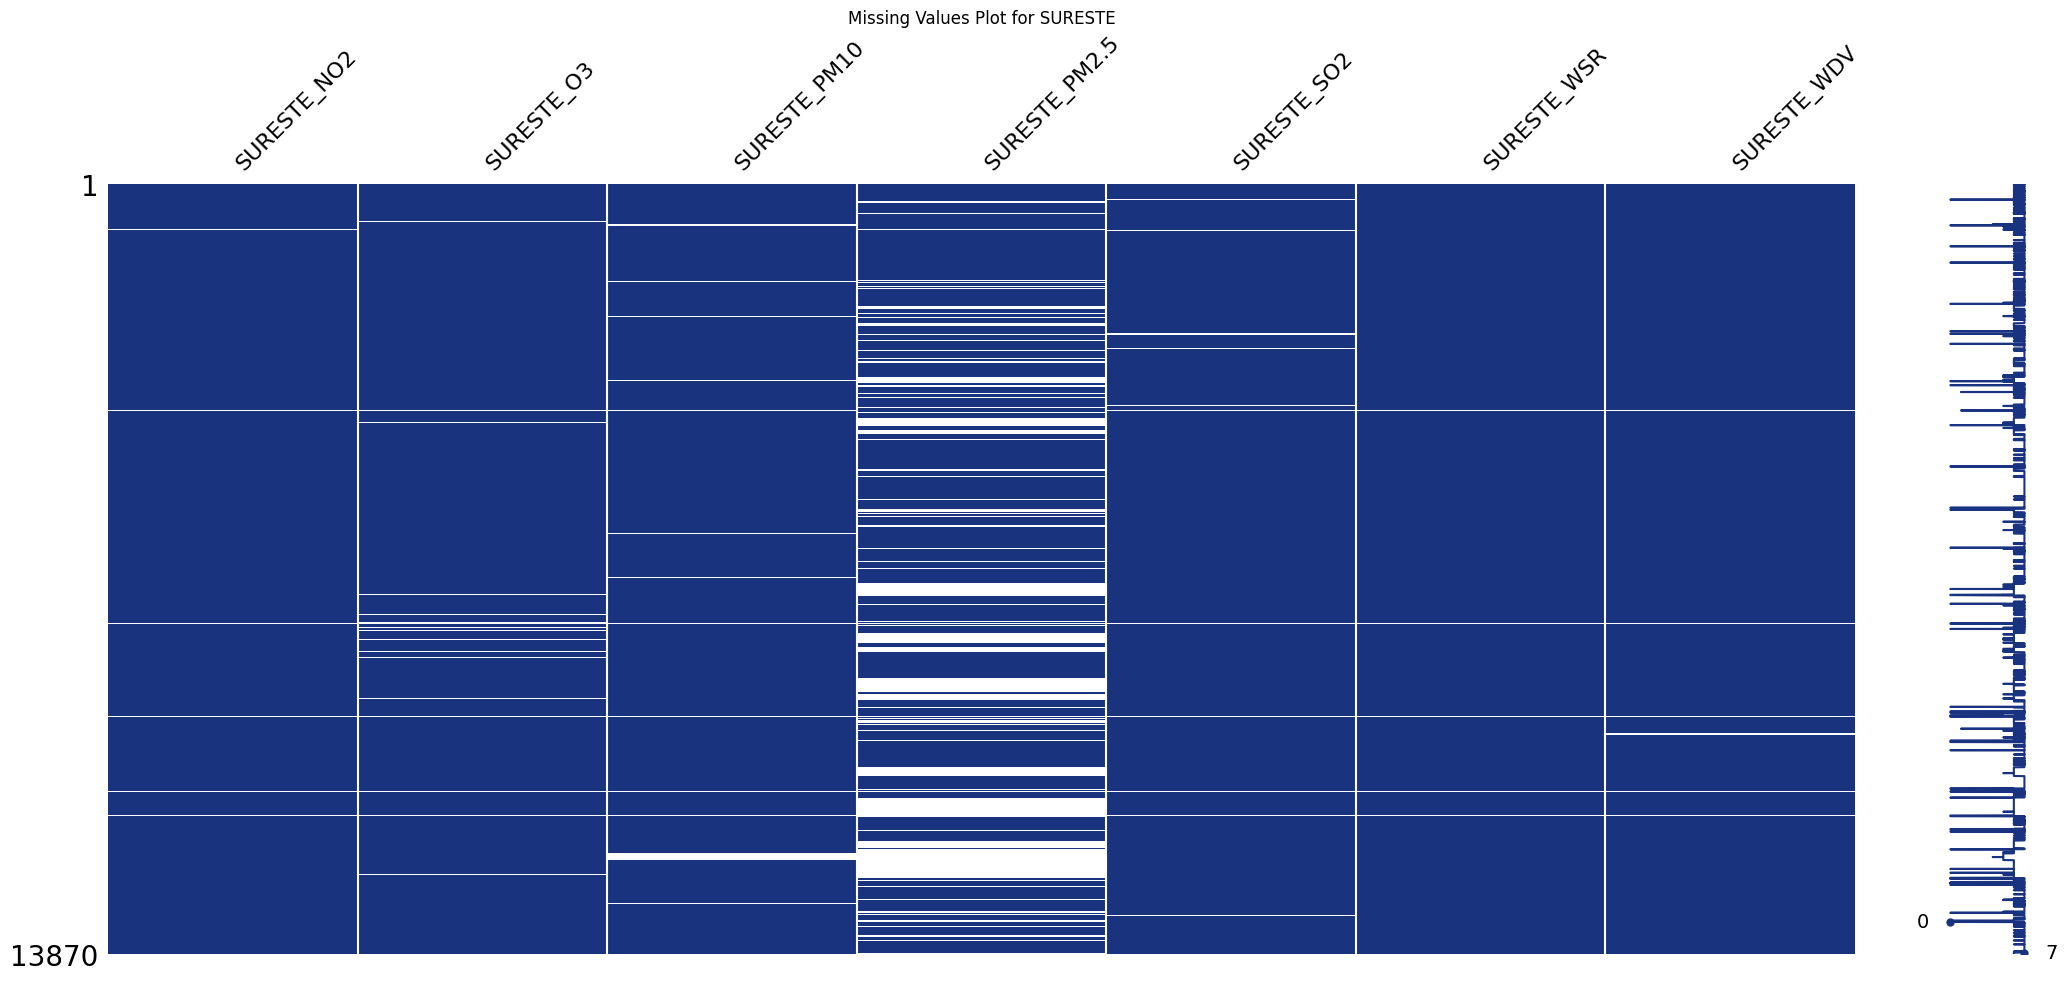

<Figure size 1200x600 with 0 Axes>

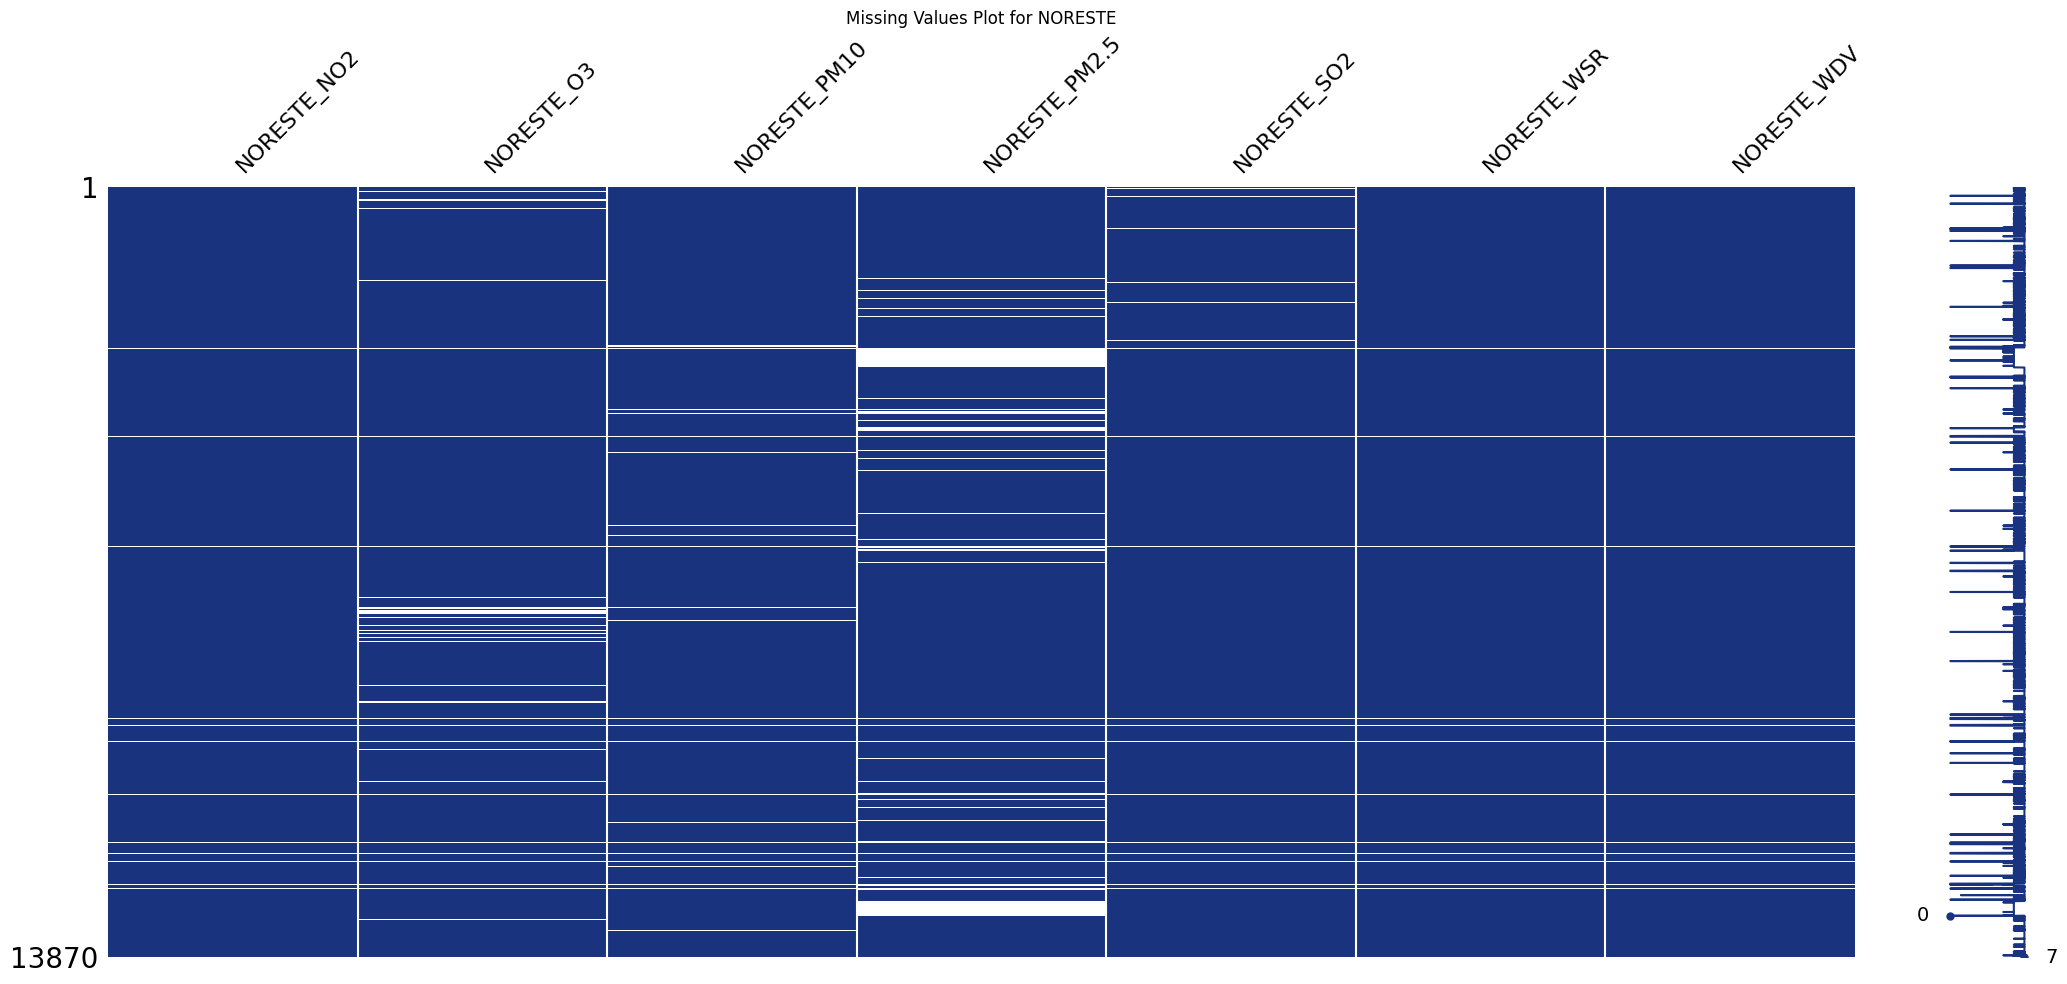

<Figure size 1200x600 with 0 Axes>

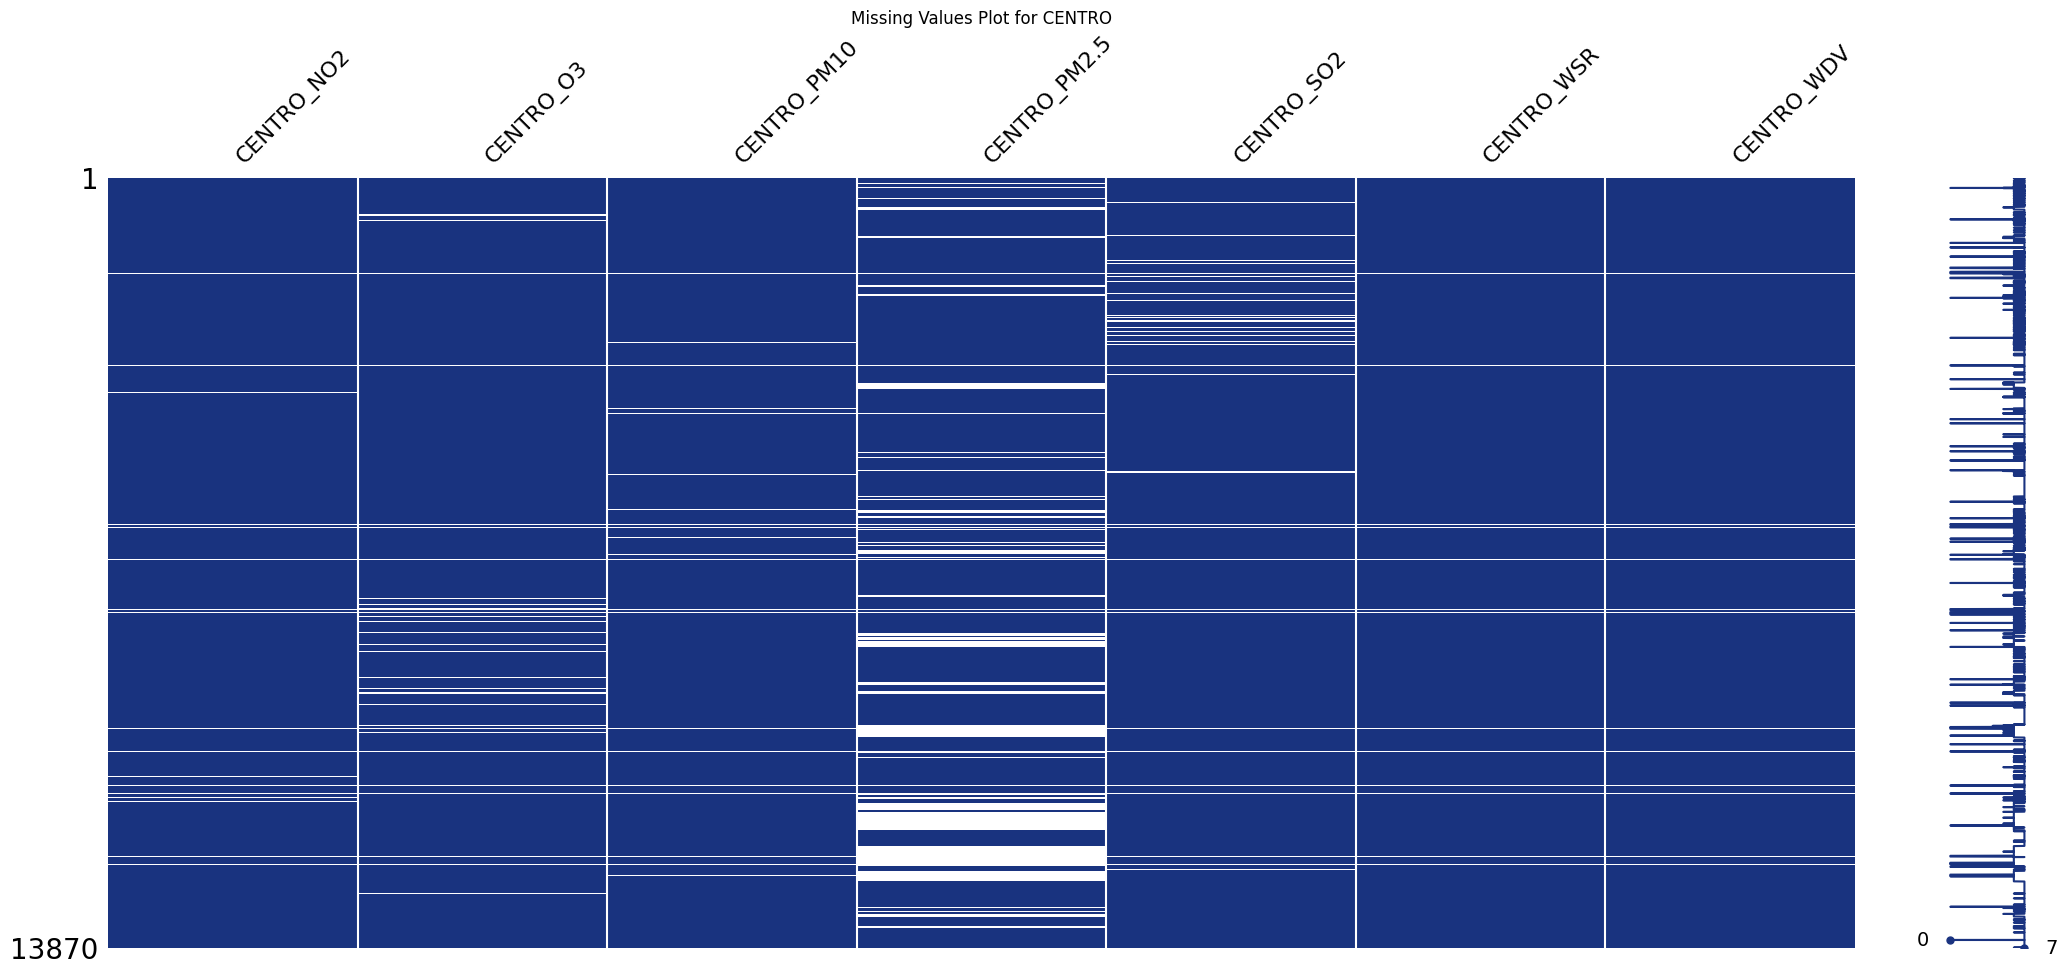

<Figure size 1200x600 with 0 Axes>

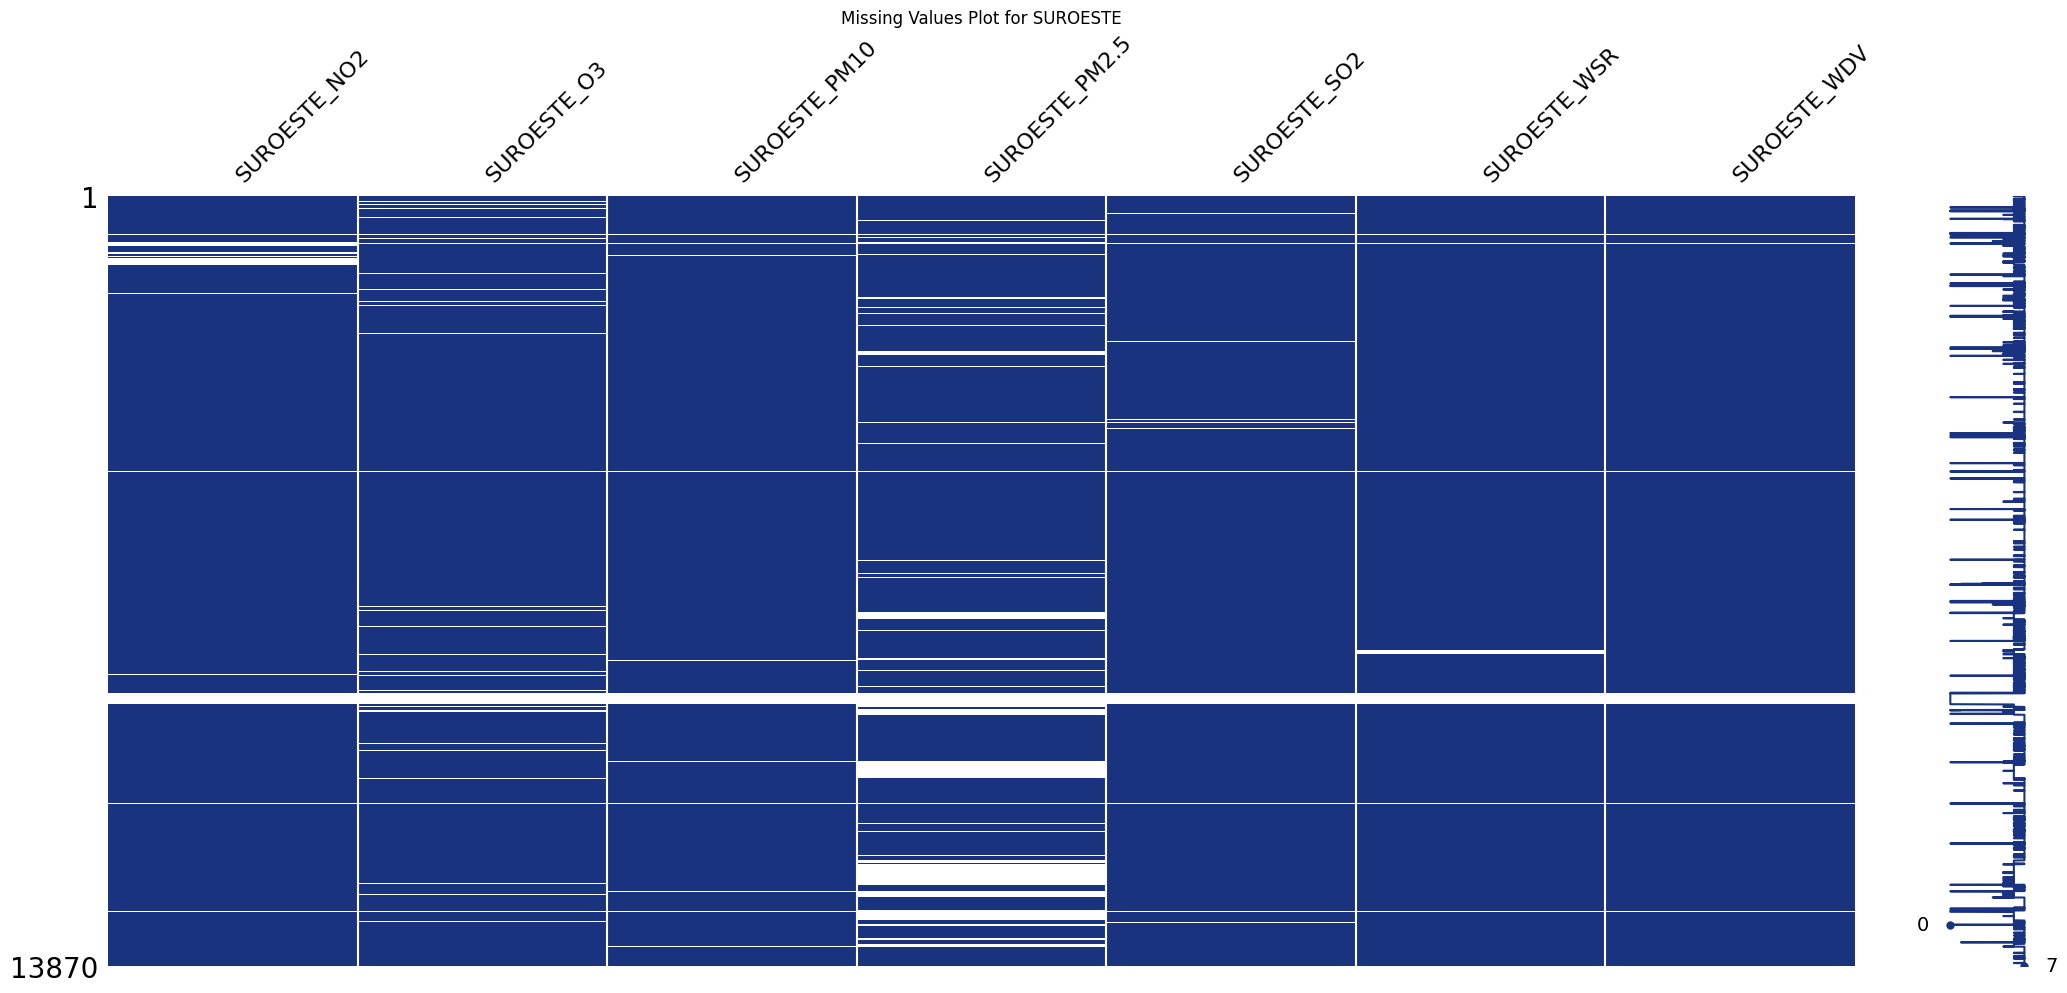

<Figure size 1200x600 with 0 Axes>

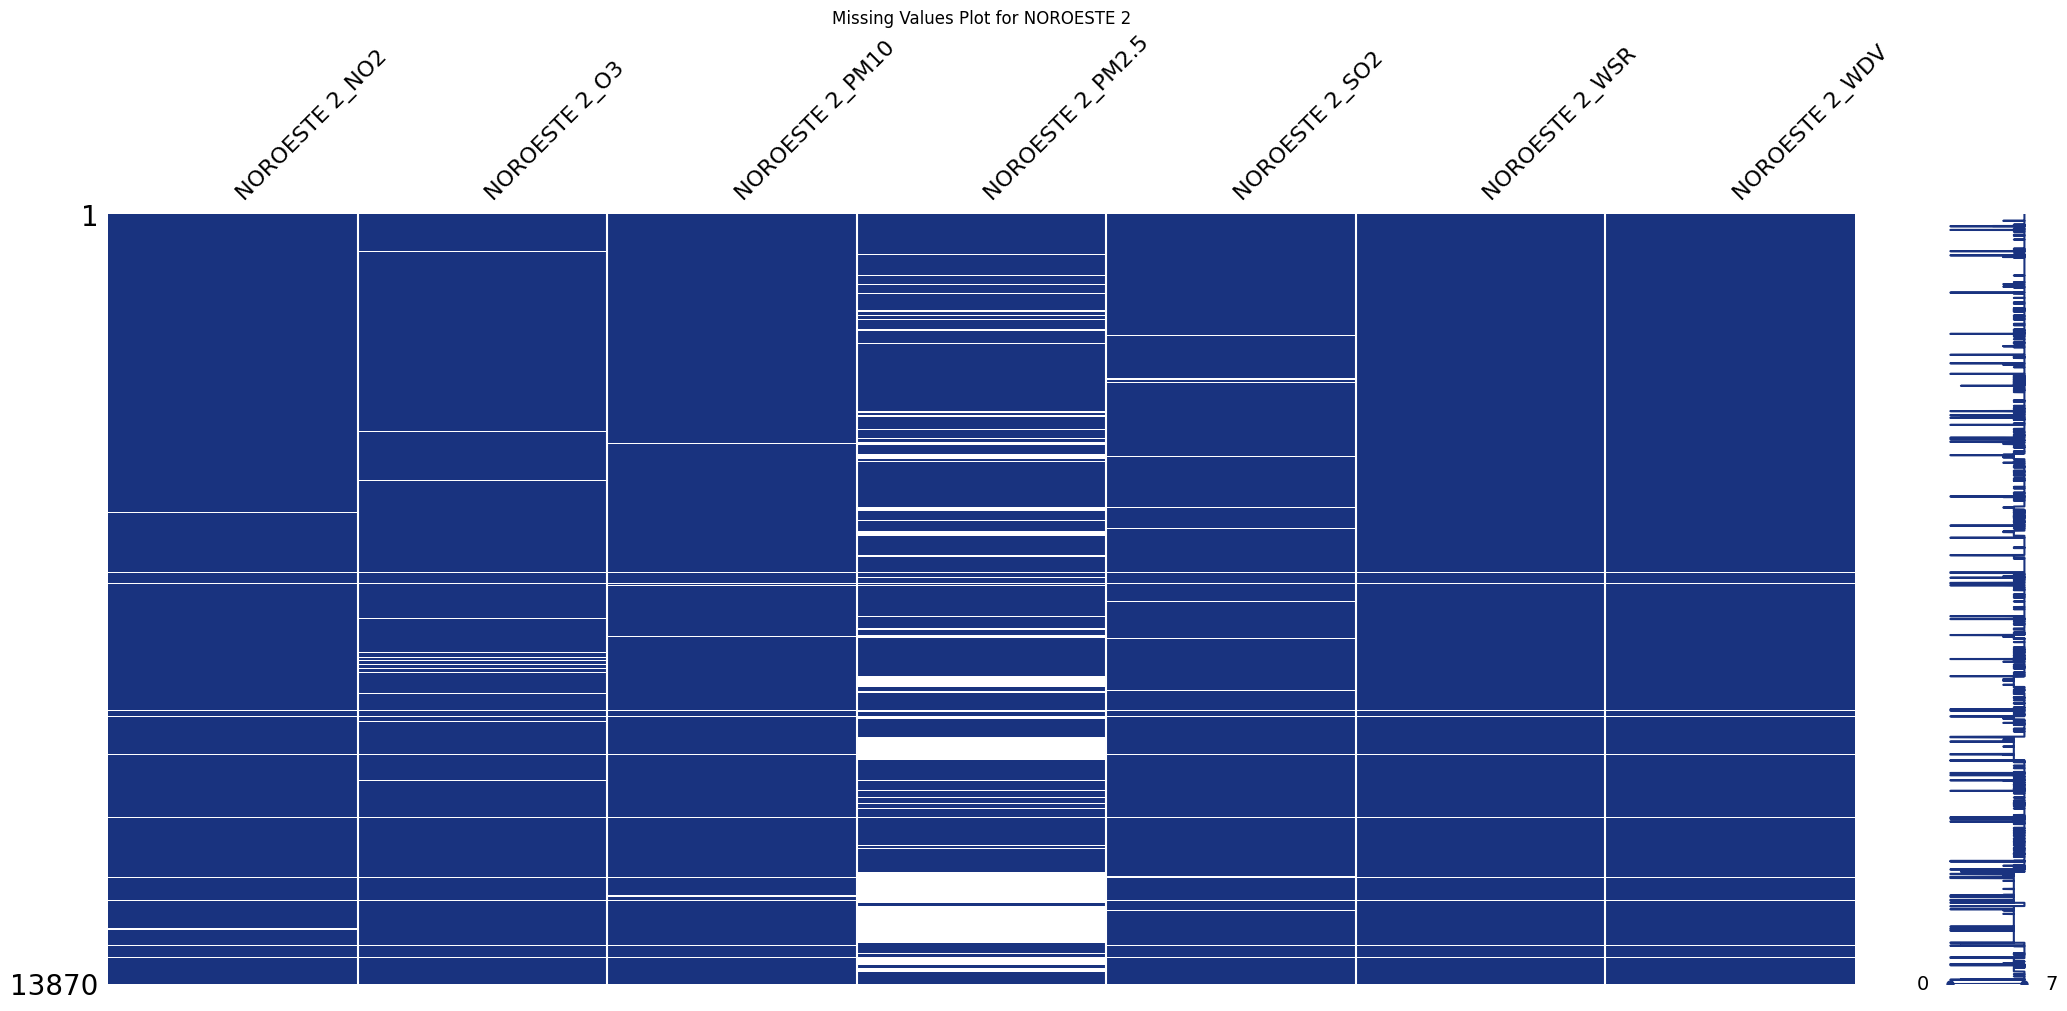

<Figure size 1200x600 with 0 Axes>

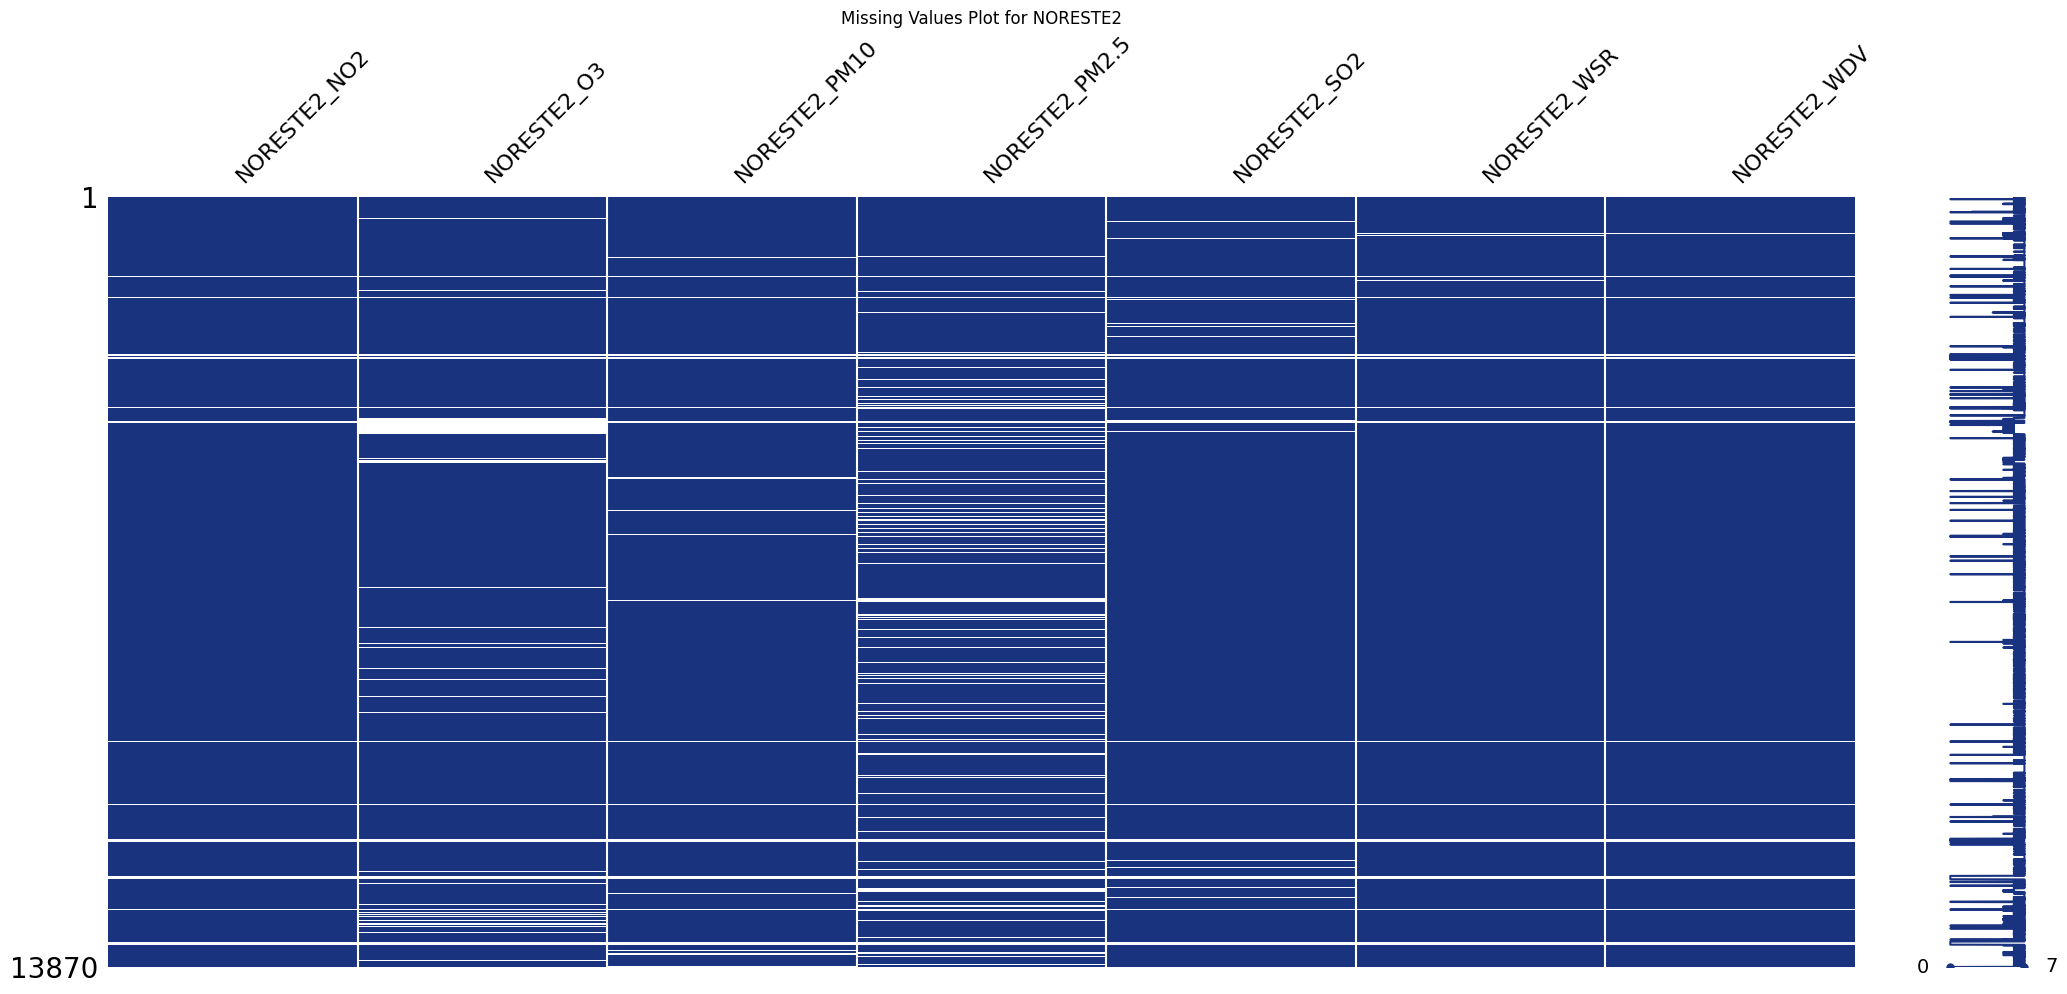

<Figure size 1200x600 with 0 Axes>

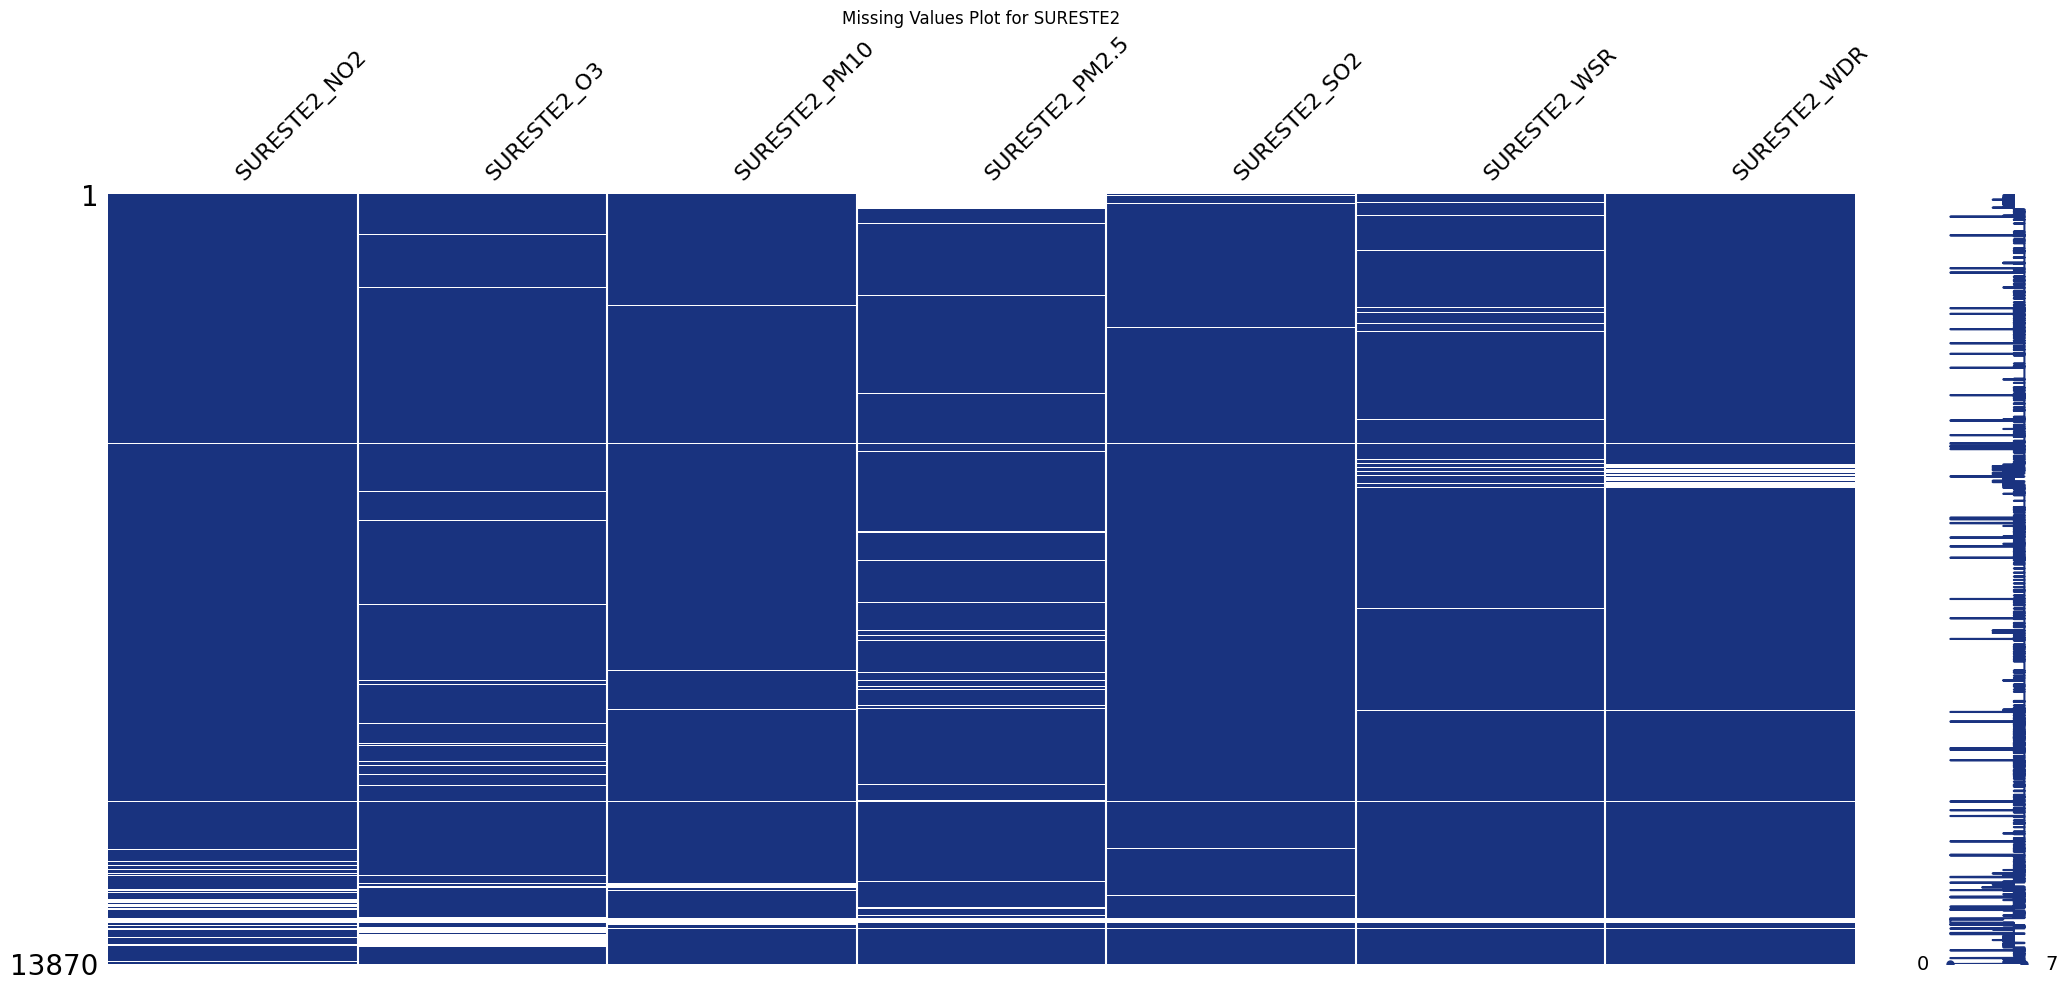

<Figure size 1200x600 with 0 Axes>

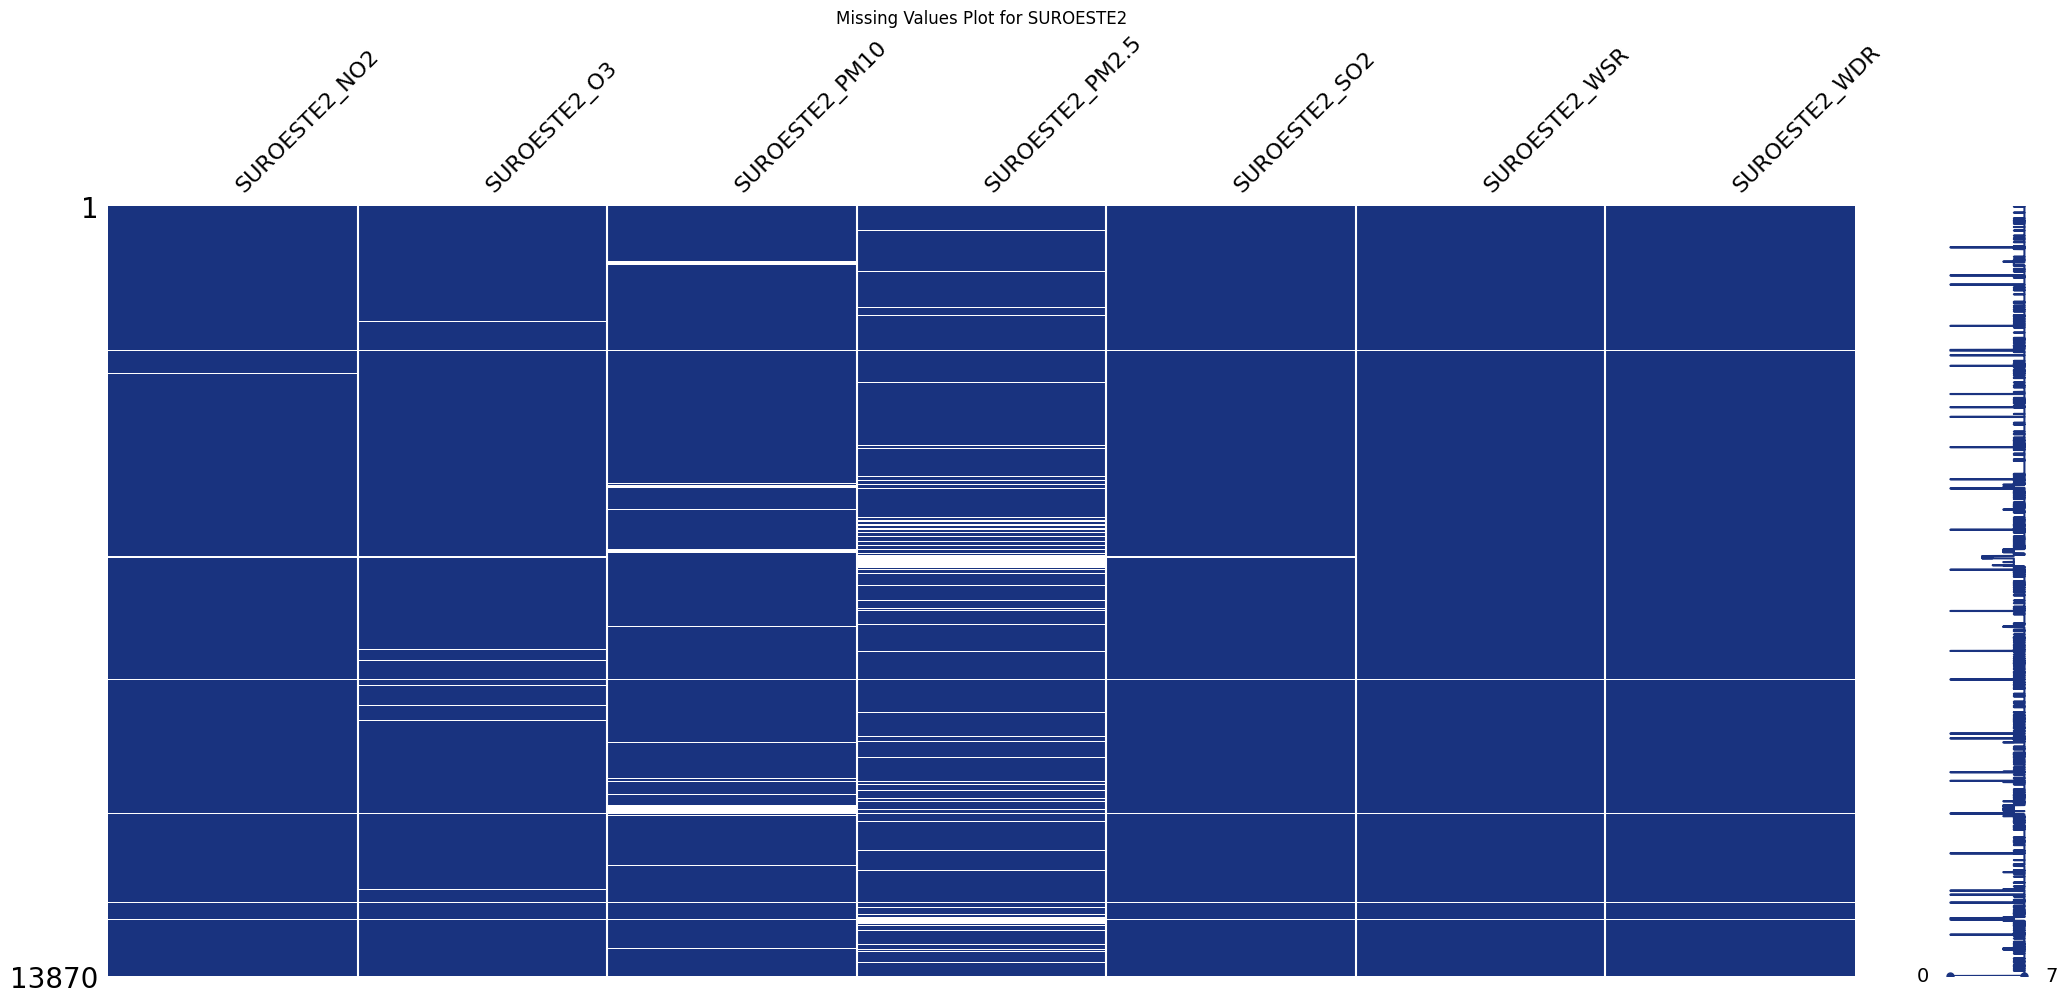

<Figure size 1200x600 with 0 Axes>

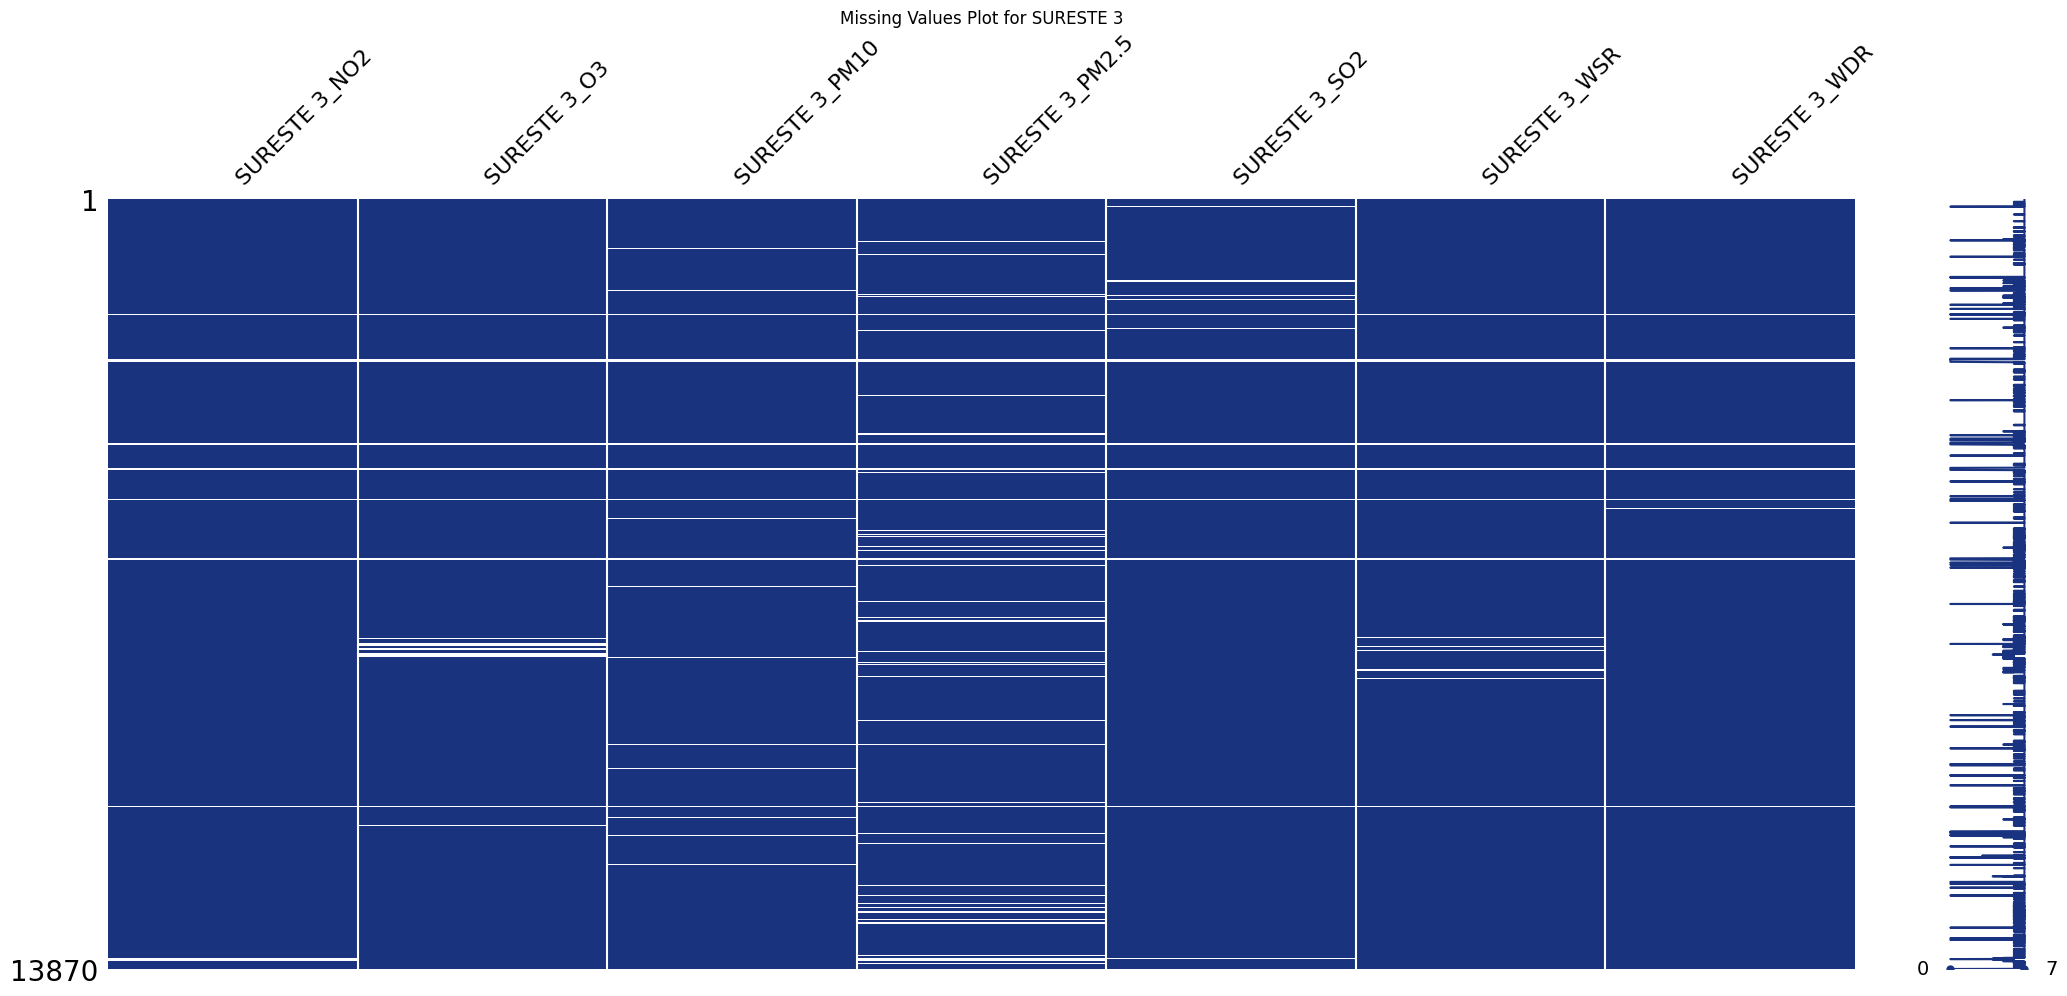

<Figure size 1200x600 with 0 Axes>

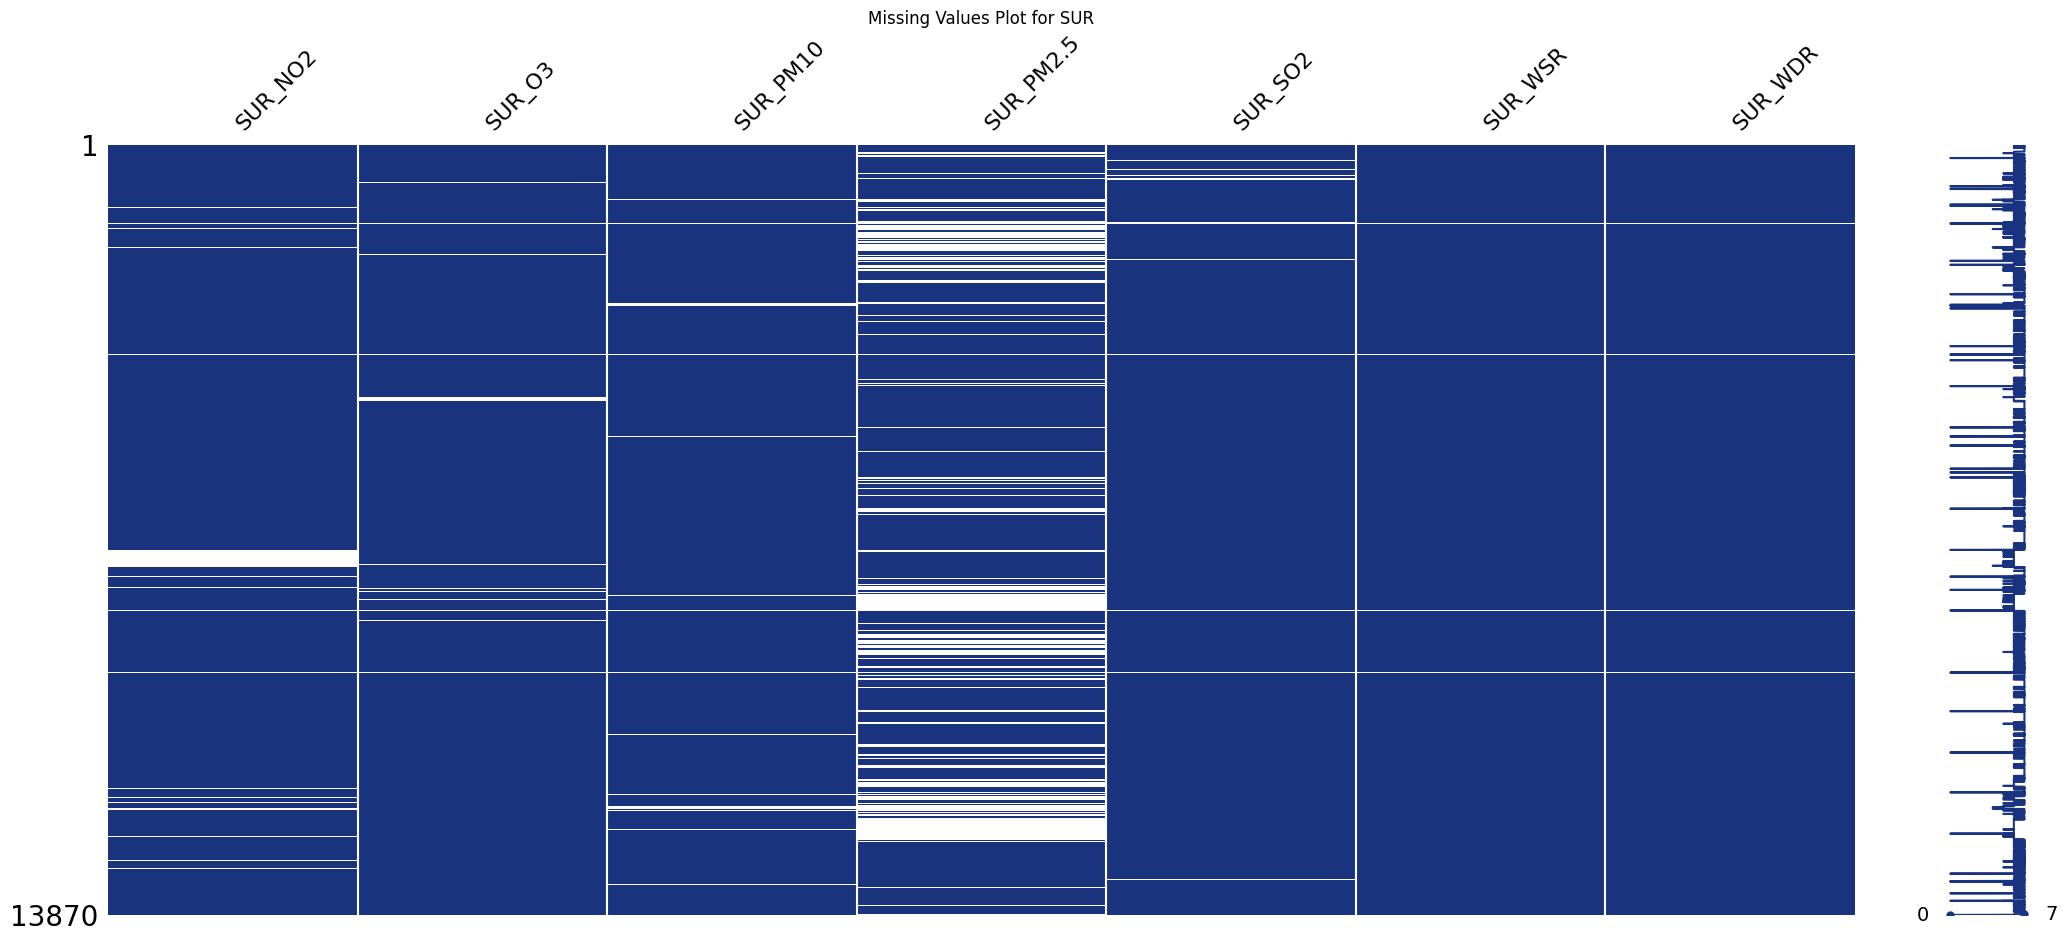

<Figure size 1200x600 with 0 Axes>

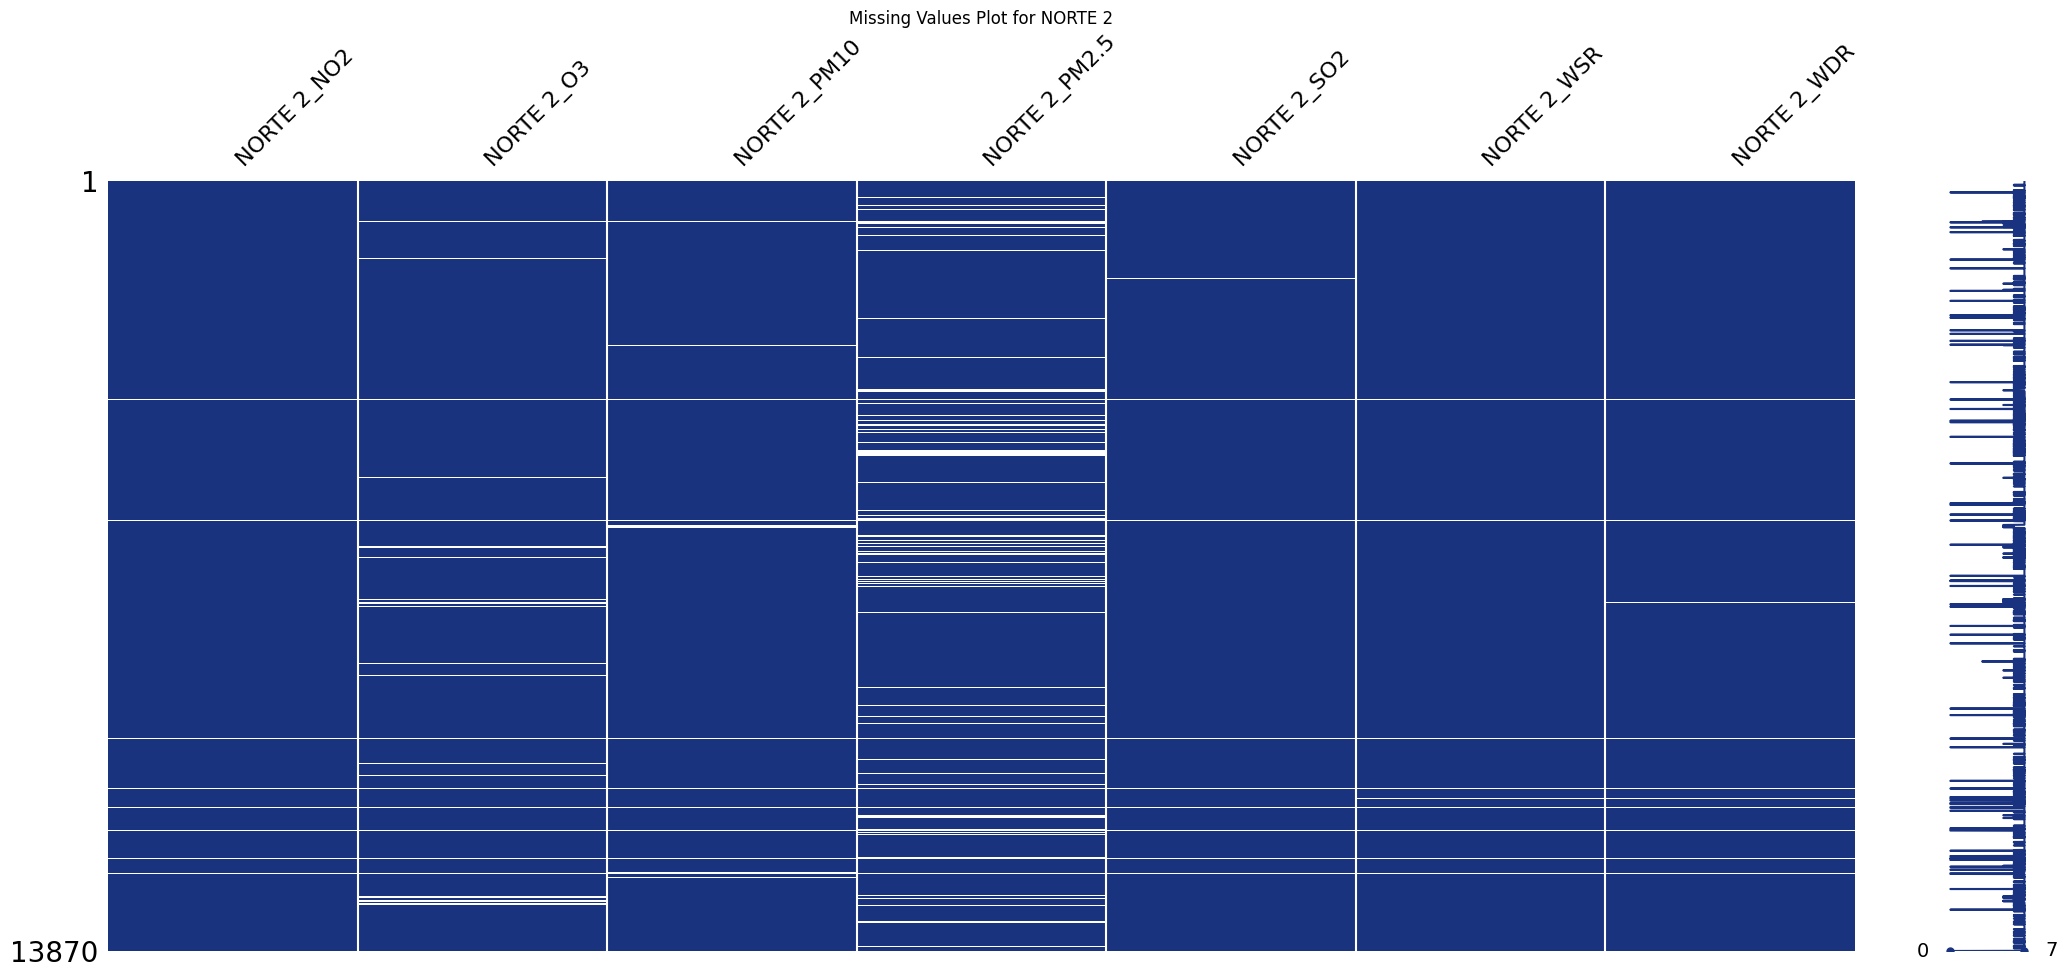

<Figure size 1200x600 with 0 Axes>

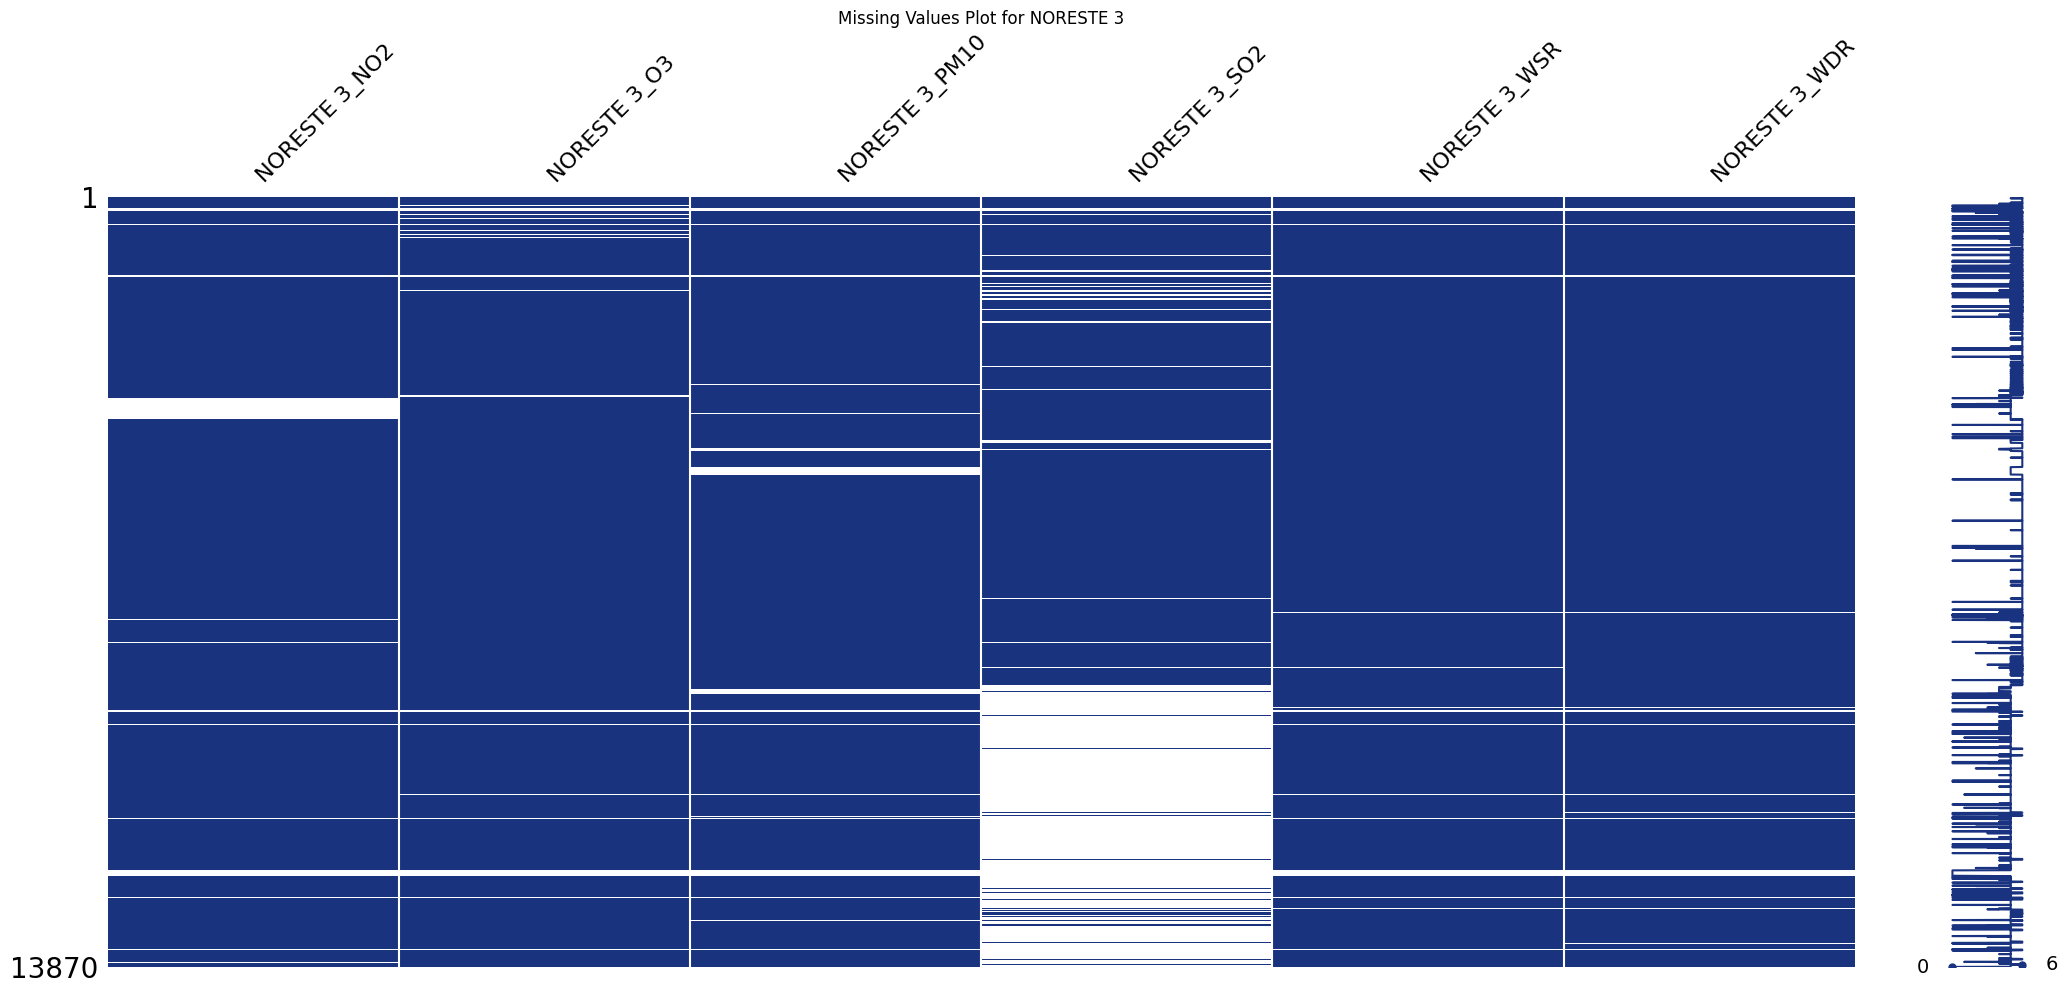

<Figure size 1200x600 with 0 Axes>

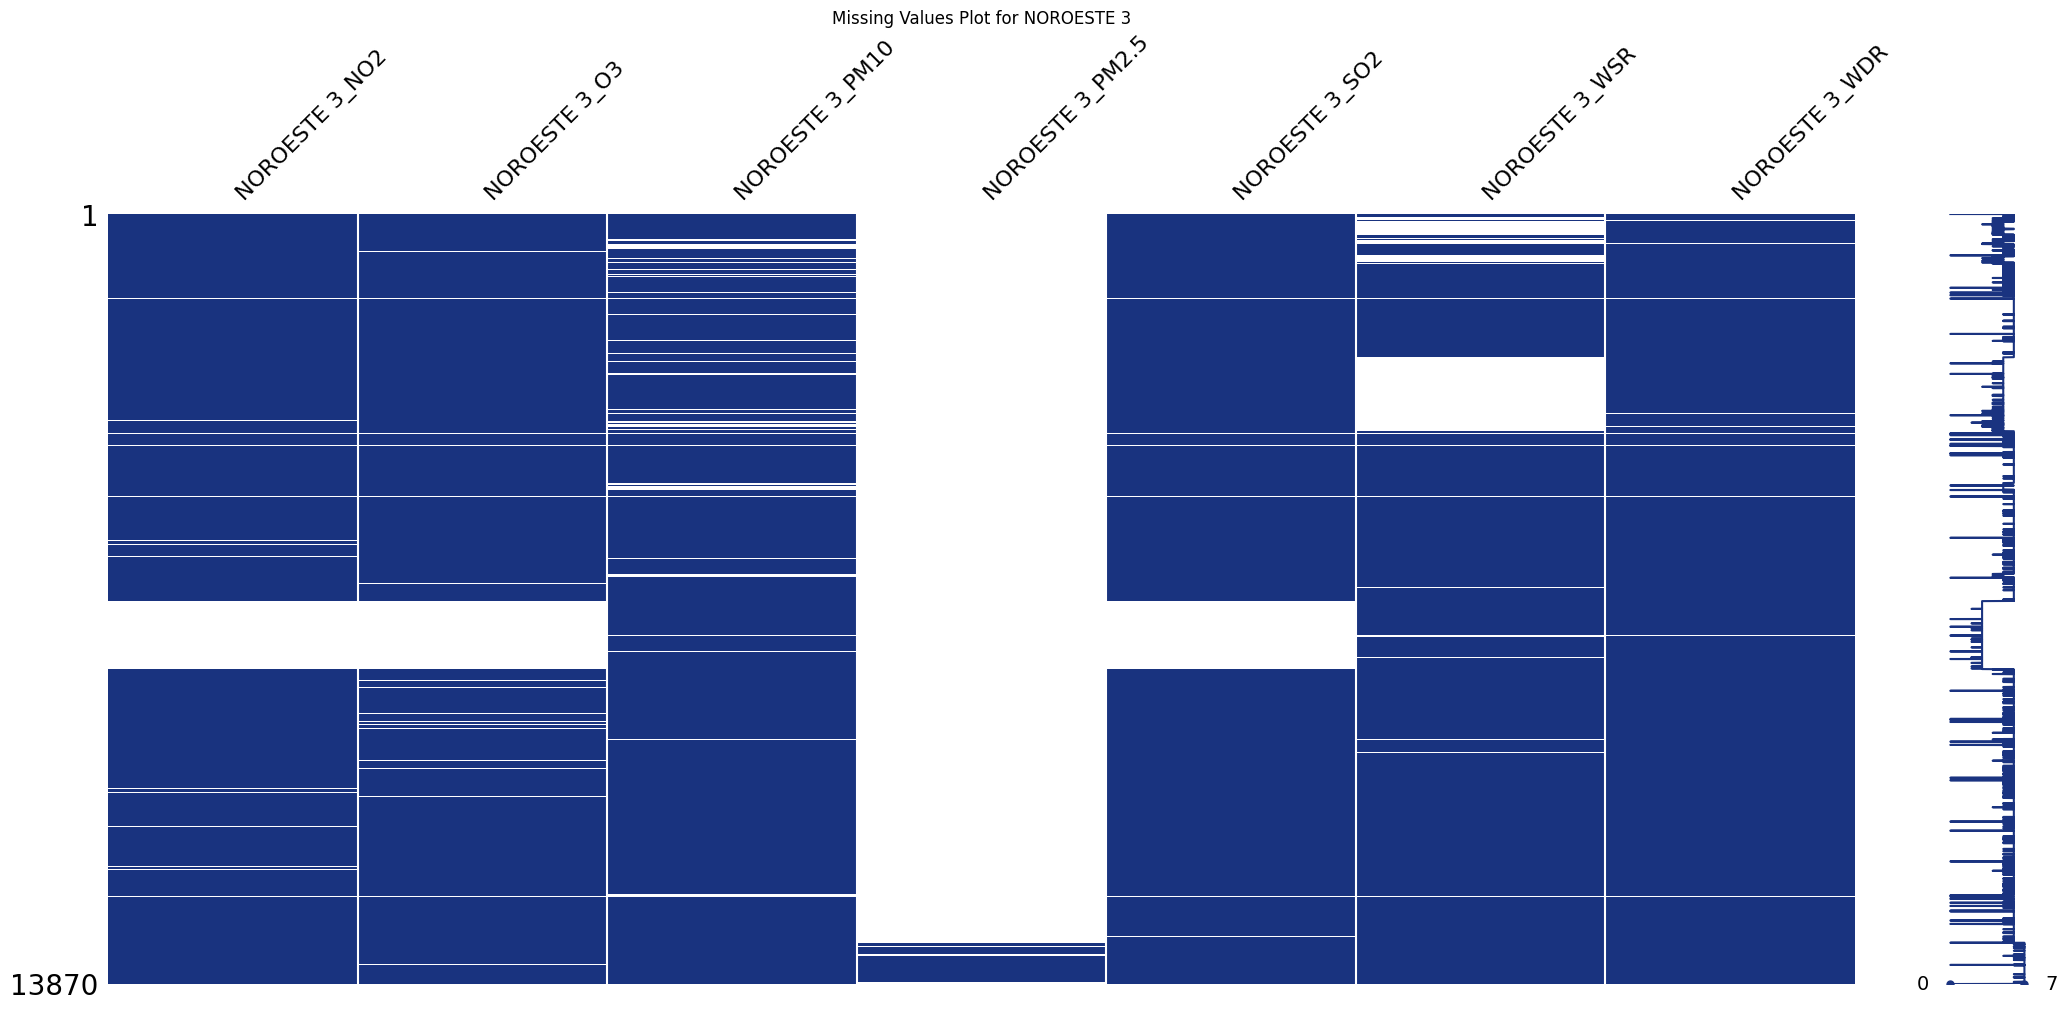

In [77]:
import missingno as msno
import matplotlib.pyplot as plt

# Flatten the multi-level columns to create a single-level index for missingno
df_flattened = df.copy()
df_flattened.columns = ['_'.join(col) for col in df.columns]

# Plot the missing values for each group based on the first header
unique_groups = df.columns.get_level_values(0).unique()

for group in unique_groups:
    # Select columns for the current group
    group_cols = [col for col in df.columns if col[0] == group]
    group_df = df[group_cols]

    # Flatten the columns for missingno
    group_df_flattened = group_df.copy()
    group_df_flattened.columns = ['_'.join(col) for col in group_df.columns]

    # Plot the missing values matrix for the current group
    plt.figure(figsize=(12, 6))
    msno.matrix(group_df_flattened, color=[0.1, 0.2, 0.5])
    plt.title(f'Missing Values Plot for {group}')
    plt.show()


Con esta herramienta gráfica se puede observar que la mayor parte de los datos nulos se encuentran en las mediciones de 'pm 2.5' siendo el caso más grave la estación NOROESTE, seguido por las mediciones de Ozono (O3) en los datos.<br>
En vista de la gran cantidad de datos faltantes para la estación NOROESTE se ha decidio eliminarla del set de datos que se trabajará así como las partículas 'pm 2.5', esto con el objetivo de evitar la imputación de datos.

In [78]:
#
to_remove=["NOROESTE", "NORTE", "PM2.5"]
cols = df.columns.to_flat_index()
filtered_cols= [col for col in cols if col[0] not in to_remove]
df = df.loc[:,pd.MultiIndex.from_tuples(filtered_cols)]
cols = df.columns.to_flat_index()
filtered_cols = [col for col in cols if col[1] not in to_remove]
df = df.loc[:,pd.MultiIndex.from_tuples(filtered_cols)]
df.head()

SURESTE                              NORESTE              \
                        NO2   O3   PM10  SO2  WSR    WDV     NO2   O3   PM10   
2023-01-01 00:00:00    32.6  3.0  110.0  3.5  3.2  257.0    43.0  7.0  222.0   
2023-01-01 01:00:00    30.3  3.0  116.0  3.4  3.3  278.0    44.4  8.0  311.0   
2023-01-01 02:00:00    28.8  3.0  117.0  3.6  3.7  278.0    41.5  7.0  723.0   
2023-01-01 03:00:00    29.1  3.0  135.0  3.8  3.6  197.0    42.3  6.0  473.0   
2023-01-01 04:00:00    25.7  NaN  132.0  3.6  4.9  271.0    39.9  5.0  372.0   

                           ... NORESTE 3                  NOROESTE 3       \
                      SO2  ...      PM10  SO2  WSR    WDR        NO2   O3   
2023-01-01 00:00:00   3.8  ...      73.0  2.7  0.5  305.0        NaN  NaN   
2023-01-01 01:00:00  24.0  ...      92.0  2.8  3.6  254.0       28.8  3.0   
2023-01-01 02:00:00   9.8  ...     133.0  2.8  4.1  250.0       26.8  3.0   
2023-01-01 03:00:00   7.8  ...     115.0  2.9  4.4  246.0       24.0  2.0   
2023-01-01 04:00:00   7.3  ...     114.0  2.9  5.1  264.0       22.2  2.0   

                                             
                      PM10  SO2   WSR   WDR  
2023-01-01 00:00:00    NaN  NaN   NaN   NaN  
2023-01-01 01:00:00  246.0  2.9  65.3  95.0  
2023-01-01 02:00:00  239.0  3.2  60.9  90.0  
2023-01-01 03:00:00  275.0  2.3  58.1  84.0  
2023-01-01 04:00:00    NaN  1.8  61.4  87.0  

[5 rows x 78 columns]

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13870 entries, 2023-01-01 00:00:00 to 2024-07-31 23:00:00
Data columns (total 78 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (SURESTE, NO2)      13717 non-null  float64
 1   (SURESTE, O3)       13464 non-null  float64
 2   (SURESTE, PM10)     13488 non-null  float64
 3   (SURESTE, SO2)      13648 non-null  float64
 4   (SURESTE, WSR)      13742 non-null  float64
 5   (SURESTE, WDV)      13740 non-null  float64
 6   (NORESTE, NO2)      13654 non-null  float64
 7   (NORESTE, O3)       13198 non-null  float64
 8   (NORESTE, PM10)     13434 non-null  float64
 9   (NORESTE, SO2)      13474 non-null  float64
 10  (NORESTE, WSR)      13658 non-null  float64
 11  (NORESTE, WDV)      13644 non-null  float64
 12  (CENTRO, NO2)       13537 non-null  float64
 13  (CENTRO, O3)        13314 non-null  float64
 14  (CENTRO, PM10)      13514 non-null  float64
 15  (CENTRO, SO2)     

Se propone una eliminación de toda observación que cuente con algún tipo de dato nulo para observar cuántos datos utilizables quedan en el dataset

In [80]:
print(df.shape)
df_cleaned = df.dropna()
df_cleaned.shape

(13870, 78)


(2350, 78)

In [81]:
null_values = df_cleaned.isnull().sum()
print(null_values)

SURESTE     NO2     0
            O3      0
            PM10    0
            SO2     0
            WSR     0
                   ..
NOROESTE 3  O3      0
            PM10    0
            SO2     0
            WSR     0
            WDR     0
Length: 78, dtype: int64


## Interpolación

Nótese que, en caso de eliminar entradas con datos nulos, estas dejarían huecos que podrían ser importantes para la serie de tiempo que describen. Por ello se considera que la mejor alternativa es inputar y, para agilizar el proceso sin comprometer la calidad, se propone una inputación por interpolación utilizando las funciones incluidas en Pandas.

In [82]:
df_interpolated = df.interpolate(method='linear')

In [83]:
# Comprobar que ya no hay datos nulos
null_values= df_interpolated.isnull().sum()
print(null_values)

SURESTE     NO2     0
            O3      0
            PM10    0
            SO2     0
            WSR     0
                   ..
NOROESTE 3  O3      1
            PM10    1
            SO2     1
            WSR     1
            WDR     1
Length: 78, dtype: int64


In [84]:
# Eliminar los pocos nulos que quedaron y guardar la db
df_cleaned = df_interpolated.dropna()

## Rangos de Valores

In [85]:
negative_values = (df_cleaned < 0).sum()
print("\nNegative Values in DataFrame:")
print(negative_values[negative_values > 0])


Negative Values in DataFrame:
Series([], dtype: int64)


In [86]:
df_cleaned.describe()

SURESTE                                                          \
                NO2            O3          PM10           SO2           WSR   
count  13869.000000  13869.000000  13869.000000  13869.000000  13869.000000   
mean      13.794553     28.494628     52.442798      3.411486     10.137234   
std        9.440424     18.323411     37.016523      1.824069      5.281724   
min        1.100000      2.000000      2.000000      0.500000      0.300000   
25%        6.700000     15.000000     28.000000      2.400000      5.700000   
50%       11.400000     26.000000     45.000000      3.100000      9.500000   
75%       18.400000     38.000000     68.000000      3.800000     14.200000   
max       77.400000    163.000000    800.000000     39.200000     31.200000   

                          NORESTE                                            \
                WDV           NO2            O3          PM10           SO2   
count  13869.000000  13869.000000  13869.000000  13869.000000  13869.000000   
mean     138.299733     14.851478     28.125279     66.632020      3.875885   
std       84.040237      9.677308     16.594303     52.922658      2.518943   
min        1.000000      0.500000      1.000000      2.000000      0.800000   
25%       88.000000      8.200000     16.000000     40.111111      2.766667   
50%      109.000000     11.800000     25.000000     56.000000      3.400000   
75%      170.000000     18.500000     37.000000     78.000000      4.200000   
max      360.000000     80.400000    155.000000   1000.000000    111.800000   

       ...     NORESTE 3                                            \
       ...          PM10           SO2           WSR           WDR   
count  ...  13869.000000  13869.000000  13869.000000  13869.000000   
mean   ...     42.578953      3.646308      8.705422    136.266205   
std    ...     32.108435      2.956666      4.949570     90.981932   
min    ...      2.000000      0.500000      1.000000      1.000000   
25%    ...     23.000000      2.300000      4.700000     73.000000   
50%    ...     35.000000      2.800000      8.100000     88.000000   
75%    ...     52.000000      4.180068     12.100000    241.000000   
max    ...    624.000000     79.600000     34.000000    360.000000   

         NOROESTE 3                                                          \
                NO2            O3          PM10           SO2           WSR   
count  13869.000000  13869.000000  13869.000000  13869.000000  13869.000000   
mean      15.064677     27.107109     68.784808      4.242977     12.713195   
std       10.622934     20.782400     51.537469      2.940214     14.937524   
min        0.000000      1.000000      2.000000      0.500000      0.100000   
25%        8.200000     11.006509     40.000000      2.900000      7.100000   
50%       11.600000     22.000000     60.000000      3.700000     10.800000   
75%       18.500000     38.000000     84.000000      4.600000     13.900000   
max       75.300000    162.000000    797.000000     66.800000    215.900000   

                     
                WDR  
count  13869.000000  
mean      95.955873  
std       94.674385  
min        1.000000  
25%       32.000000  
50%       59.000000  
75%      103.000000  
max      360.000000  

[8 rows x 78 columns]

La normativa que regula y etiqueta la distribución de contaminantes describe las concentraciones de NO2, O3 y SO2 en partóculas por millón (PPM) en vez de partículas por billón (PPB) por esto se propone hacer el cambio de unidades, de esta manera el comparativo para encontrar datos erroneos puede realizarse de manera directa

In [87]:
headers_to_divide = ["NO2", "O3", "SO2"]

for col in df_cleaned.columns:
    group, col_name = col
    if col_name in headers_to_divide:
        df_cleaned[col] = df_cleaned[col] / 1000

df_cleaned.describe()


C:\Users\juanj\AppData\Local\Temp\ipykernel_10924\1174437391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col] / 1000


SURESTE                                                          \
                NO2            O3          PM10           SO2           WSR   
count  13869.000000  13869.000000  13869.000000  13869.000000  13869.000000   
mean       0.013795      0.028495     52.442798      0.003411     10.137234   
std        0.009440      0.018323     37.016523      0.001824      5.281724   
min        0.001100      0.002000      2.000000      0.000500      0.300000   
25%        0.006700      0.015000     28.000000      0.002400      5.700000   
50%        0.011400      0.026000     45.000000      0.003100      9.500000   
75%        0.018400      0.038000     68.000000      0.003800     14.200000   
max        0.077400      0.163000    800.000000      0.039200     31.200000   

                          NORESTE                                            \
                WDV           NO2            O3          PM10           SO2   
count  13869.000000  13869.000000  13869.000000  13869.000000  13869.000000   
mean     138.299733      0.014851      0.028125     66.632020      0.003876   
std       84.040237      0.009677      0.016594     52.922658      0.002519   
min        1.000000      0.000500      0.001000      2.000000      0.000800   
25%       88.000000      0.008200      0.016000     40.111111      0.002767   
50%      109.000000      0.011800      0.025000     56.000000      0.003400   
75%      170.000000      0.018500      0.037000     78.000000      0.004200   
max      360.000000      0.080400      0.155000   1000.000000      0.111800   

       ...     NORESTE 3                                            \
       ...          PM10           SO2           WSR           WDR   
count  ...  13869.000000  13869.000000  13869.000000  13869.000000   
mean   ...     42.578953      0.003646      8.705422    136.266205   
std    ...     32.108435      0.002957      4.949570     90.981932   
min    ...      2.000000      0.000500      1.000000      1.000000   
25%    ...     23.000000      0.002300      4.700000     73.000000   
50%    ...     35.000000      0.002800      8.100000     88.000000   
75%    ...     52.000000      0.004180     12.100000    241.000000   
max    ...    624.000000      0.079600     34.000000    360.000000   

         NOROESTE 3                                                          \
                NO2            O3          PM10           SO2           WSR   
count  13869.000000  13869.000000  13869.000000  13869.000000  13869.000000   
mean       0.015065      0.027107     68.784808      0.004243     12.713195   
std        0.010623      0.020782     51.537469      0.002940     14.937524   
min        0.000000      0.001000      2.000000      0.000500      0.100000   
25%        0.008200      0.011007     40.000000      0.002900      7.100000   
50%        0.011600      0.022000     60.000000      0.003700     10.800000   
75%        0.018500      0.038000     84.000000      0.004600     13.900000   
max        0.075300      0.162000    797.000000      0.066800    215.900000   

                     
                WDR  
count  13869.000000  
mean      95.955873  
std       94.674385  
min        1.000000  
25%       32.000000  
50%       59.000000  
75%      103.000000  
max      360.000000  

[8 rows x 78 columns]

In [88]:
df_cleaned.shape

(13869, 78)

## Sobre Datos Atípicos

Se nos informó que los datos atípicos son, en efecto, datos reales comprobados por el mismo socio formador, por lo que se recomienda ya no procesarlos, sino conservalos como están.

In [89]:
def narrow_above_thresholds(df, thresholds):
    df_copy = df.copy()
    for col in df.columns:
        group, col_name = col
        if col_name in thresholds:
            threshold = thresholds[col_name]
            df_copy[col] = df_copy[col].apply(lambda x: min(x, threshold))
    return df_copy

thresholds = {
    'NO2': 0.3,
    'O3': 0.2,
    'PM10': 900,
    'SO2': 0.6,
    'WSR': 45,
    'WDV': 360
}
# Apply the function to remove observations above the thresholds
df_filtered = narrow_above_thresholds(df_cleaned, thresholds)

# Display the filtered DataFrame
print(df_filtered)

                    SURESTE                                       NORESTE  \
                        NO2        O3   PM10     SO2   WSR    WDV     NO2   
2023-01-01 01:00:00  0.0303  0.003000  116.0  0.0034   3.3  278.0  0.0444   
2023-01-01 02:00:00  0.0288  0.003000  117.0  0.0036   3.7  278.0  0.0415   
2023-01-01 03:00:00  0.0291  0.003000  135.0  0.0038   3.6  197.0  0.0423   
2023-01-01 04:00:00  0.0257  0.003333  132.0  0.0036   4.9  271.0  0.0399   
2023-01-01 05:00:00  0.0231  0.003667   96.0  0.0030   6.8  284.0  0.0351   
...                     ...       ...    ...     ...   ...    ...     ...   
2024-07-31 19:00:00  0.0043  0.026000   88.0  0.0023  20.3  147.0  0.0060   
2024-07-31 20:00:00  0.0045  0.024000   94.0  0.0022  17.1  147.0  0.0075   
2024-07-31 21:00:00  0.0039  0.024000   83.0  0.0021  19.8  143.0  0.0090   
2024-07-31 22:00:00  0.0039  0.023000   95.0  0.0020  21.4  129.0  0.0097   
2024-07-31 23:00:00  0.0048  0.020000  103.0  0.0020  20.9  108.0  0.0090   

In [90]:
print("Dataset shape: ")
df_filtered.shape

Dataset shape: 


(13869, 78)

En este punto se puede comprobar que ninguna observación ha sido perdida en el procesamiento de los datos, esto resulta de gran utilidad dado que algunas posibles técnicas de análisis como las series de tiempo requieren uniformidad en la distribución de las observaciones en torno al tiempo.

In [91]:
df_filtered.describe()

SURESTE                                                          \
                NO2            O3          PM10           SO2           WSR   
count  13869.000000  13869.000000  13869.000000  13869.000000  13869.000000   
mean       0.013795      0.028495     52.442798      0.003411     10.137234   
std        0.009440      0.018323     37.016523      0.001824      5.281724   
min        0.001100      0.002000      2.000000      0.000500      0.300000   
25%        0.006700      0.015000     28.000000      0.002400      5.700000   
50%        0.011400      0.026000     45.000000      0.003100      9.500000   
75%        0.018400      0.038000     68.000000      0.003800     14.200000   
max        0.077400      0.163000    800.000000      0.039200     31.200000   

                          NORESTE                                            \
                WDV           NO2            O3          PM10           SO2   
count  13869.000000  13869.000000  13869.000000  13869.000000  13869.000000   
mean     138.299733      0.014851      0.028125     66.599725      0.003876   
std       84.040237      0.009677      0.016594     52.386824      0.002519   
min        1.000000      0.000500      0.001000      2.000000      0.000800   
25%       88.000000      0.008200      0.016000     40.111111      0.002767   
50%      109.000000      0.011800      0.025000     56.000000      0.003400   
75%      170.000000      0.018500      0.037000     78.000000      0.004200   
max      360.000000      0.080400      0.155000    900.000000      0.111800   

       ...     NORESTE 3                                            \
       ...          PM10           SO2           WSR           WDR   
count  ...  13869.000000  13869.000000  13869.000000  13869.000000   
mean   ...     42.578953      0.003646      8.705422    136.266205   
std    ...     32.108435      0.002957      4.949570     90.981932   
min    ...      2.000000      0.000500      1.000000      1.000000   
25%    ...     23.000000      0.002300      4.700000     73.000000   
50%    ...     35.000000      0.002800      8.100000     88.000000   
75%    ...     52.000000      0.004180     12.100000    241.000000   
max    ...    624.000000      0.079600     34.000000    360.000000   

         NOROESTE 3                                                          \
                NO2            O3          PM10           SO2           WSR   
count  13869.000000  13869.000000  13869.000000  13869.000000  13869.000000   
mean       0.015065      0.027107     68.784808      0.004243     11.629587   
std        0.010623      0.020782     51.537469      0.002940      7.700453   
min        0.000000      0.001000      2.000000      0.000500      0.100000   
25%        0.008200      0.011007     40.000000      0.002900      7.100000   
50%        0.011600      0.022000     60.000000      0.003700     10.800000   
75%        0.018500      0.038000     84.000000      0.004600     13.900000   
max        0.075300      0.162000    797.000000      0.066800     45.000000   

                     
                WDR  
count  13869.000000  
mean      95.955873  
std       94.674385  
min        1.000000  
25%       32.000000  
50%       59.000000  
75%      103.000000  
max      360.000000  

[8 rows x 78 columns]

Revisando el análisis estadístico básico sobre los datos no se puede detectar ninguna anomalía respecto al rango de los valores que cada observación puede tomar.

Habiendo realizado las siguientes tareas se exporta el archivo de datos:


*   Dimensión original del dataset.
*   Descrición de variables.
*   Verificación de la calidad de los datos: Valores faltantes y valores erróneos.
*   Definición del conjunto de datos a utilizar.
*   Interpolación de datos faltantes y erroneos.
*   Acotamiento de datos fuera del rango válido.

Falta realizar las siguientes tareas:
*   Manejo de datos duplicados, y atípicos en el dataset
*   Analizar la conveniencia de realizar transformacions en los datos
*   Analizar al conveniencia de construir atributos derivados
*   Realizar el informe sobre la presentación de datos



In [92]:
df_cleaned.to_csv("Output/HalfProcessedDataset.csv")
#df_filtered.to_csv("HalfProcessedDataset.csv")